# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  k-means clustering algorithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evaluate K-means Algorithm 
> 2. Understand the effect of the parameters on the performance of the algorithm .
> 3. Understand the effect of distance.

## 1. Write K means function 

import required libraries 

In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import random
from sklearn.decomposition import PCA


In [3]:
data_points=pd.read_csv("Customer data.csv",index_col=0)
data_points=data_points.to_numpy()

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function should be able to handle data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To increase speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assignment you are required to implement the following two 
    - Euclidean distance
    - Pearson correlation distance
  

In [3]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    # Cluster_Centroids: a numpy array of shape (K, M) where K is the number of clusters and M is the number of features
    # Data_points: a numpy array of shape (N, M) where N is the number of data points and M is the number of features
    # Distance_Type: a string indicating the type of distance to use, either "euclidean" or "pearson"
    # returns: a numpy array of shape (N, K) where each element is the distance between a data point and a cluster centroid

    # check the validity of the inputs
    if not isinstance(Cluster_Centroids, np.ndarray) or not isinstance(Data_points, np.ndarray):
        raise TypeError("Cluster_Centroids and Data_points must be numpy arrays")
    if Cluster_Centroids.shape[1] != Data_points.shape[1]:
        raise ValueError("Cluster_Centroids and Data_points must have the same number of features")
    if Distance_Type not in ["euclidean", "pearson"]:
        raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'")

    # calculate the distance matrix
    if Distance_Type == "euclidean":
        # use the broadcasting feature of numpy to compute the squared euclidean distance
        # between each data point and each cluster centroid
        # the result is a numpy array of shape (N, K)
        distance_matrix = np.sum((Data_points[:, np.newaxis, :] - Cluster_Centroids[np.newaxis, :, :]) ** 2, axis=-1)
    elif Distance_Type == "pearson":
        # use the numpy.corrcoef function to compute the pearson correlation coefficient
        # between each data point and each cluster centroid
        # the result is a numpy array of shape (N + K, N + K)
        correlation_matrix = np.corrcoef(np.vstack((Data_points, Cluster_Centroids)))
        # extract the relevant part of the correlation matrix
        # the result is a numpy array of shape (N, K)
        distance_matrix = correlation_matrix[:Data_points.shape[0], Data_points.shape[0]:]
        # convert the correlation coefficient to a distance measure
        # by subtracting it from 1 and taking the absolute value
        distance_matrix = 1-distance_matrix

    return distance_matrix


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assignment 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minimum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Update Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [4]:
data_points[:5,2:]

array([[    67,      2, 124670,      1,      2],
       [    22,      1, 150773,      1,      2],
       [    49,      1,  89210,      0,      0],
       [    45,      1, 171565,      1,      1],
       [    53,      1, 149031,      1,      1]], dtype=int64)

In [5]:
np.argmax(data_points[:5,2:],axis=1,keepdims=True)

array([[2],
       [2],
       [2],
       [2],
       [2]], dtype=int64)

In [6]:
def GUC_Kmean(Data_points, K,  Distance_Type, epsilon=1e-6):
   # check the validity of the inputs
   if not isinstance(Data_points, np.ndarray):
      raise TypeError("Data_points must be a numpy array")
   if not isinstance(K, int) or K <= 0 or K > Data_points.shape[0]:
      raise ValueError("K must be a positive integer smaller than or equal to the number of data points")
   if Distance_Type not in ["euclidean", "pearson"]:
      raise ValueError("Distance_Type must be either 'euclidean' or 'pearson'")

   # initialize the cluster centroids randomly from the data points
   Cluster_Centroids = Data_points[random.sample(range(Data_points.shape[0]), K), :]

   # initialize the cluster assignments and the cluster metric
   Cluster_Assignments = np.zeros(Data_points.shape[0], dtype=int)
   Cluster_Metric = 0

   # initialize a flag to indicate whether the algorithm has converged
   converged = False
   Distortion = 0
   # loop until convergence
   while not converged:
      flag = 0
      # calculate the distance matrix between the data points and the cluster centroids
      distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)

      # assign each data point to the closest cluster centroid
      Cluster_Assignments = np.argmin(distance_matrix, axis=1)
      Final_Cluster_Distance = np.min(distance_matrix, axis=1)
      
      for i in range(K):
         # get the data points that belong to the i-th cluster
         cluster_points = Data_points[Cluster_Assignments == i, :]
         # check if the cluster has any data points
         if cluster_points.shape[0] == 0:
            flag=1
            if Distance_Type=="euclidean":
               Cluster_Centroids[i] = Data_points[random.sample(range(Data_points.shape[0]), 1), :]
            else:
               Cluster_Centroids = Data_points[random.sample(range(Data_points.shape[0]), K), :]

            break
         elif Distance_Type=="euclidean":
            # calculate the mean value for the cluster points
            Cluster_Centroids[i, :] = np.mean(cluster_points, axis=0)
         else:
            # calculate the median value for the cluster points
            Cluster_Centroids[i, :] = np.median(cluster_points, axis=0)
            
      if flag:
         continue

      # calculate the cluster metric as the sum of squared error between each point and its cluster center
      new_Distortion = np.sum((Data_points - Cluster_Centroids[Cluster_Assignments, :]) ** 2)
      
      # check if the stopping condition has improved
      if np.abs(Distortion - new_Distortion) > epsilon:
         # update the stopping condition
         Distortion = new_Distortion
      else:
         # the algorithm has converged
         converged = True
   Cluster_Metric=new_Distortion
   # Return the cluster labels, the cluster centroids, and the distortion function
   return [ Cluster_Assignments, Cluster_Centroids, Final_Cluster_Distance, Cluster_Metric ]    

## 2. Display Results 

* below is a an example function that displays Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originally be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


> #### 2.1. helper Display function 

In [7]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km[0]==i,0],X[km[0]==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km[1][i][0],km[1][i][1],c = color[i], marker = 'x', s = 100)

In [8]:
def plot_clusters_2D(data, distance_type="euclidean", n_clusters=0):
    distortion=None
    if n_clusters==0:
        plt.scatter(data[:, 0], data[:, 1], c='b',alpha=0.5,s=20)
    else:
        # Perform k-means clustering on the data
        arr = GUC_Kmean(data, n_clusters, distance_type)
        labels = arr[0]
        centroids = arr[1]
        distortion= arr[-1]
        # Plot the data points and centroids in 2D
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow',alpha=0.5,s=20)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='black')
        plt.xlabel('feature1')
        plt.ylabel('feature2')
        plt.title('Clusters of 2D data')
        plt.show()
    return distortion

In [9]:
def plot_clusters_PCA(data, distance_type="euclidean", n_clusters=0):
    distortion=None
    if n_clusters==0:
        plt.scatter(data[:, 0], data[:, 1], c='b',alpha=0.5,s=20)
    else:
        # Perform clustering and plotting
        # Perform k-means clustering on the data
        arr = GUC_Kmean(data, n_clusters, distance_type)
        labels = arr[0]
        centroids = arr[1]
        distortion=arr[-1]
        # Perform PCA to reduce the data to 2 dimensions
        pca = PCA(n_components=2, random_state=0).fit(data)
        data_2d = pca.transform(data)
        centroids_2d = pca.transform(centroids)

        # Plot the data points and centroids in 2D
        plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rainbow',alpha=0.5,s=20)
        plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='black')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.title('Clusters of PCA data')
        plt.show()
    return distortion

In [10]:
def plot_clusters_nD(data, distance_type="euclidean", n_clusters=0):
    distortion = None
    n_features = data.shape[1] # get the number of features
    n_rows = n_cols = int(np.ceil(np.sqrt(n_features))) # get the number of rows and columns for subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10)) # create a figure with subplots
    fig.suptitle('Clusters of nD data') # set the figure title
    for i in range(n_features): # loop over the features
        row = i // n_cols # get the row index
        col = i % n_cols # get the column index
        ax = axes[row, col] # get the subplot axis
        if n_clusters == 0: # if no clustering is performed
            ax.scatter(data[:, i], data[:, (i+1) % n_features], c='b', alpha=0.5, s=20) # plot the data points
        else: # if clustering is performed
            # Perform k-means clustering on the data
            arr = GUC_Kmean(data, n_clusters, distance_type)
            labels = arr[0]
            centroids = arr[1]
            distortion = arr[-1]
            # Plot the data points and centroids in 2D
            ax.scatter(data[:, i], data[:, (i+1) % n_features], c=labels, cmap='rainbow', alpha=0.5, s=20) # plot the data points with cluster colors
            ax.scatter(centroids[:, i], centroids[:, (i+1) % n_features], marker='x', color='black') # plot the centroids with black crosses
        ax.set_xlabel('feature' + str(i+1)) # set the x label
        ax.set_ylabel('feature' + str((i+1) % n_features + 1)) # set the y label
    plt.tight_layout() # adjust the layout
    plt.show() # show the plot
    return distortion # return the distortion


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

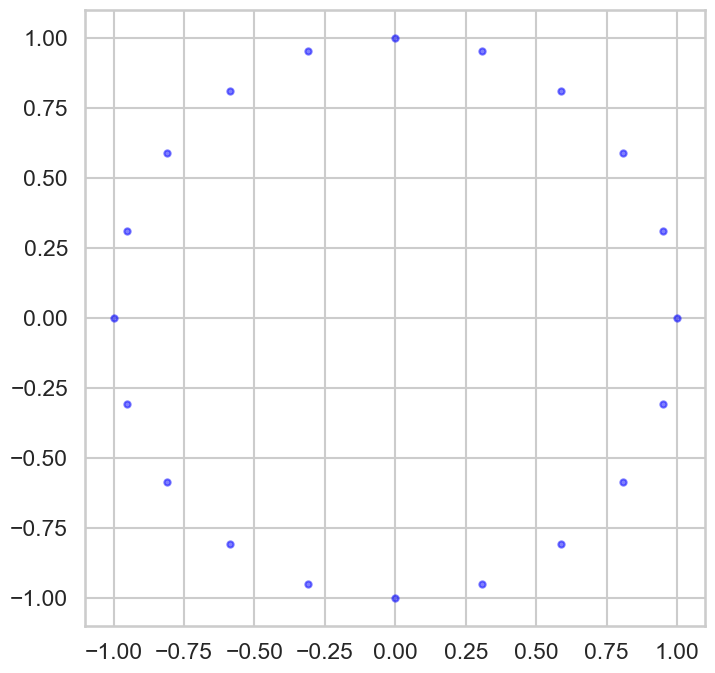

In [11]:
# prepare the figure size and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

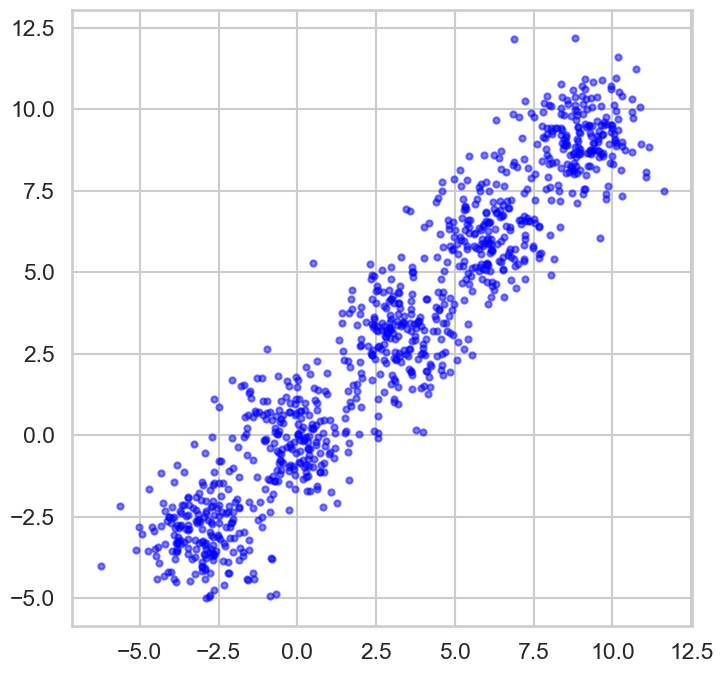

In [12]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y3 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

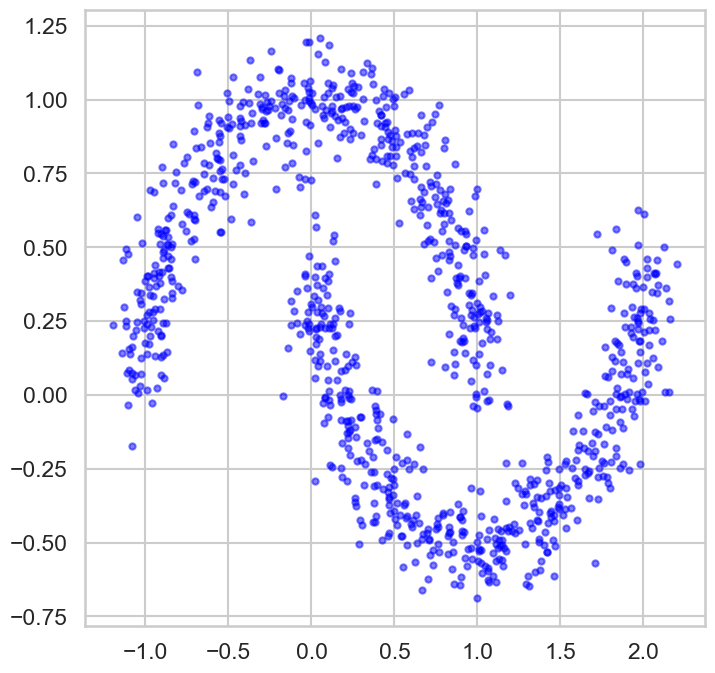

In [13]:
n_samples = 1000
X3, y3 = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Try a varying number of cluster centroids that range from 2 to 10 clusters on each set. You can use a for loop to iterate over the possible values of K and apply the GUC_Kmean function with the desired distance type.

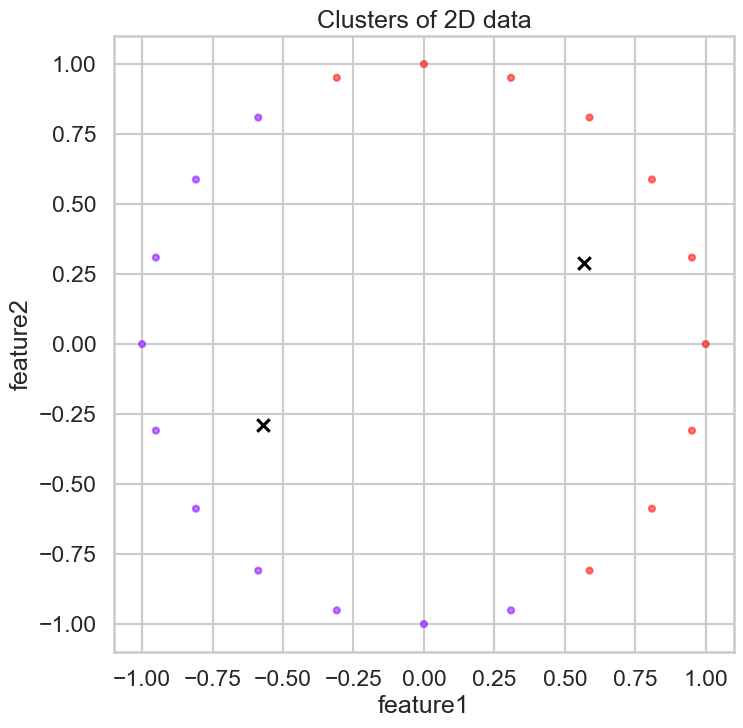

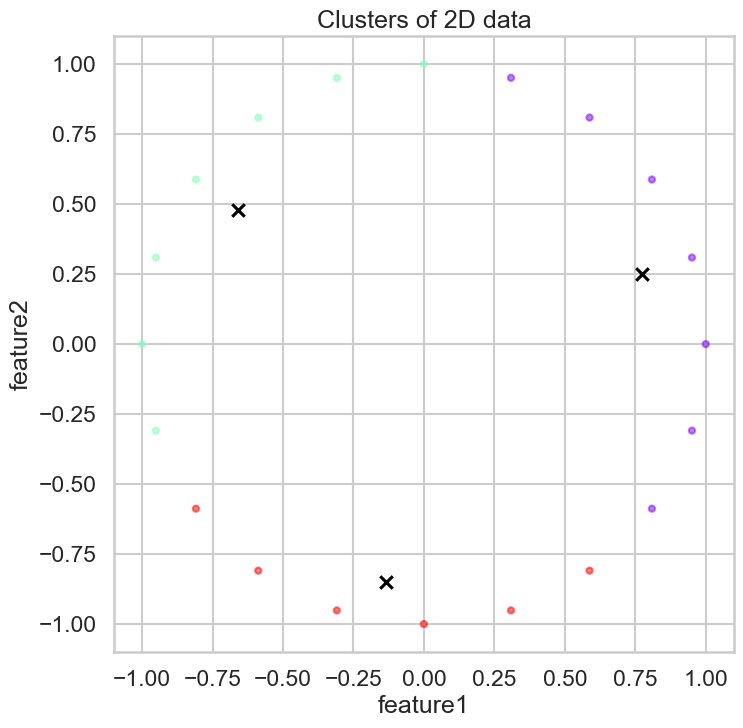

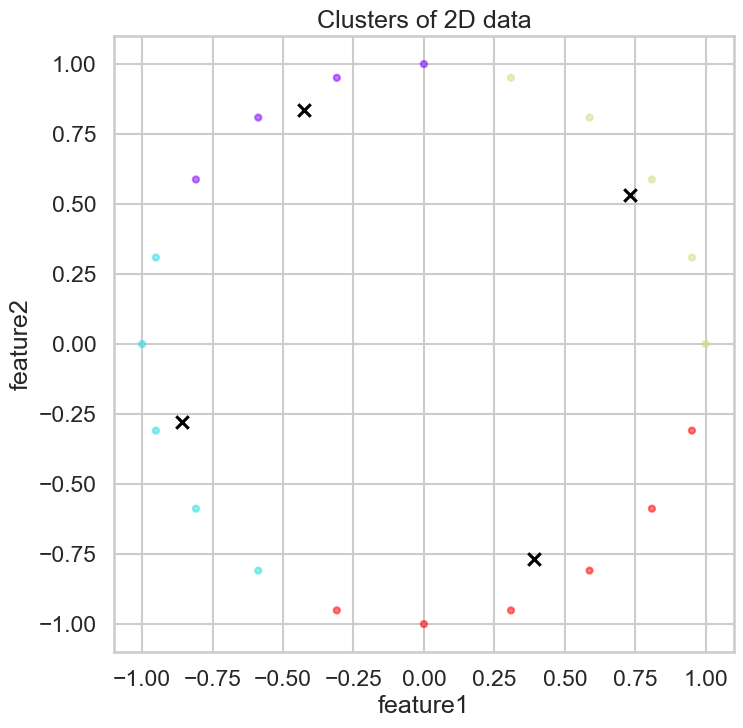

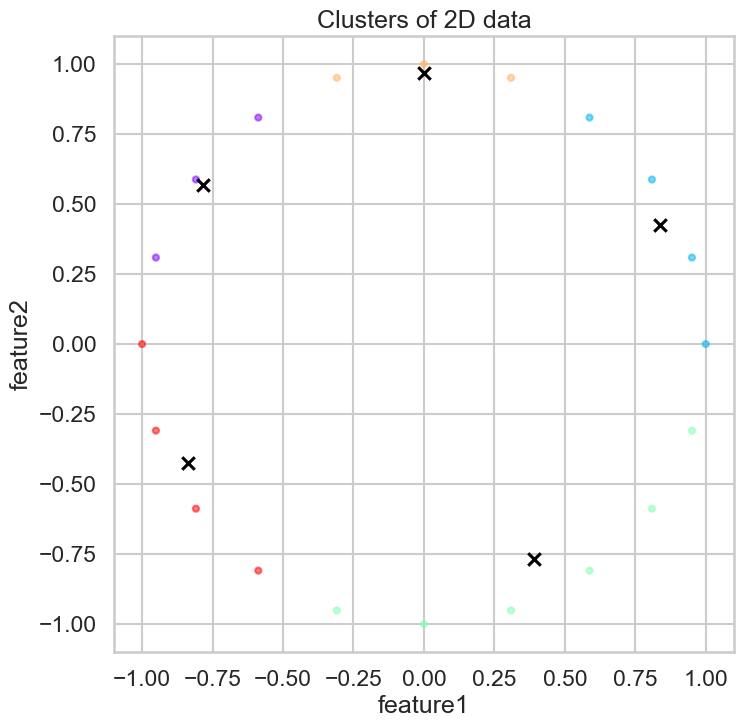

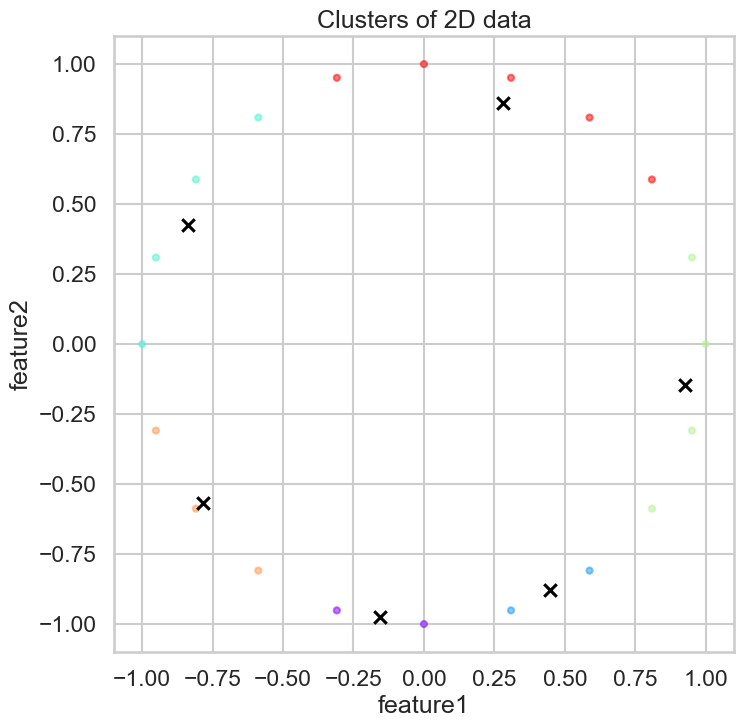

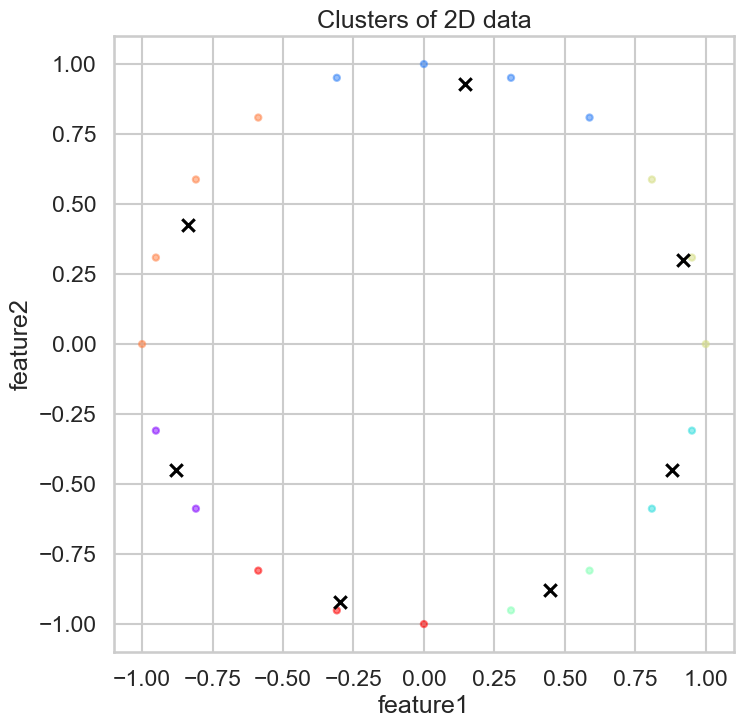

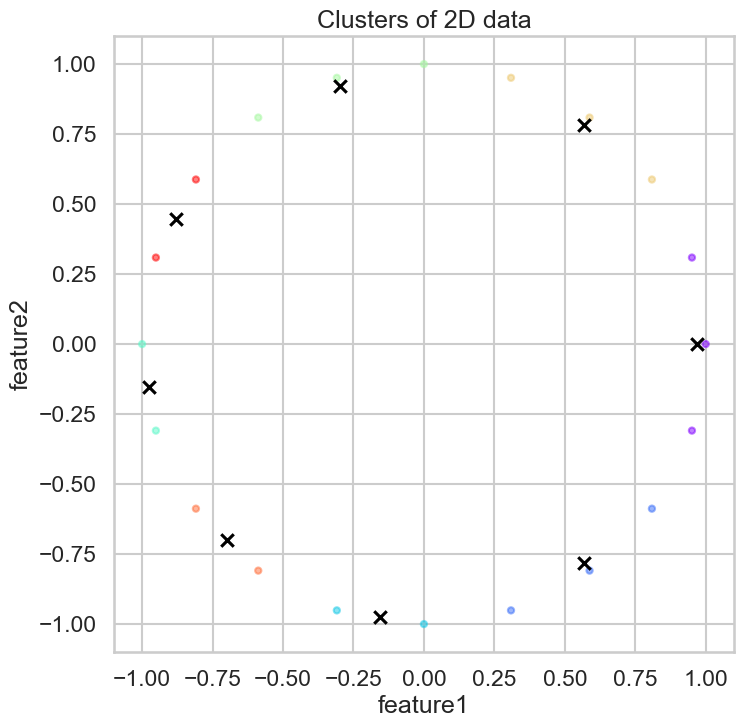

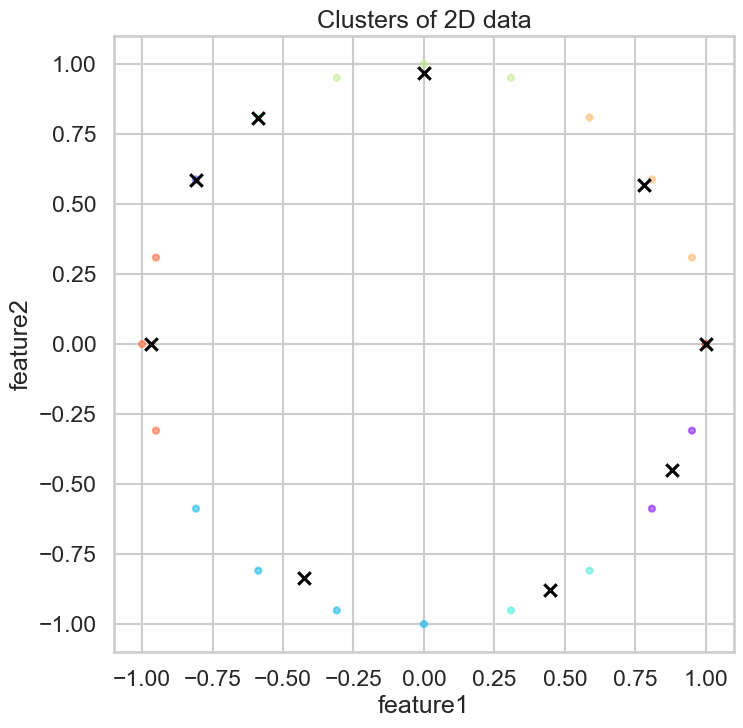

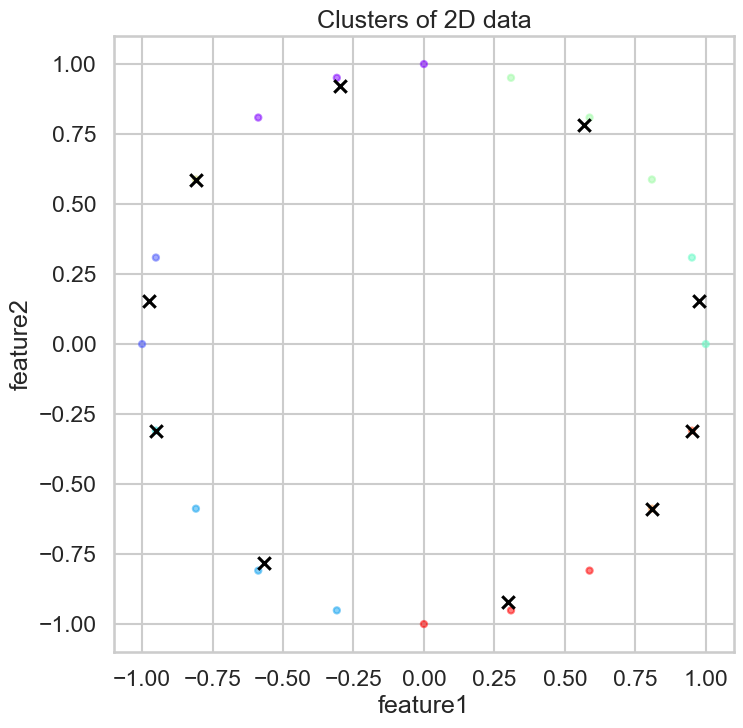

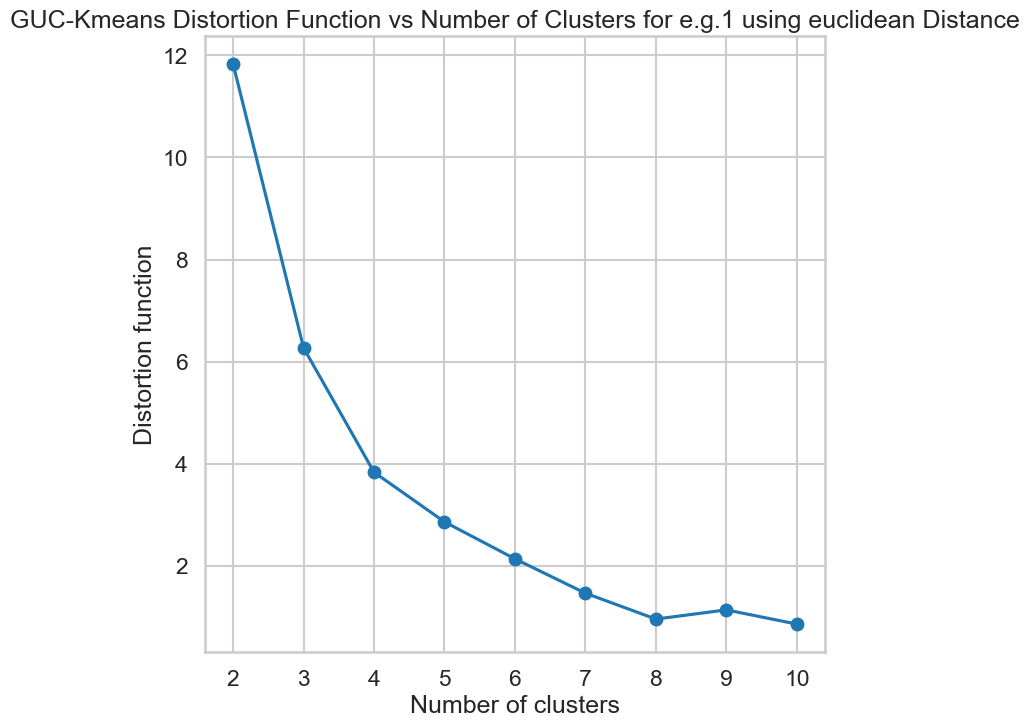

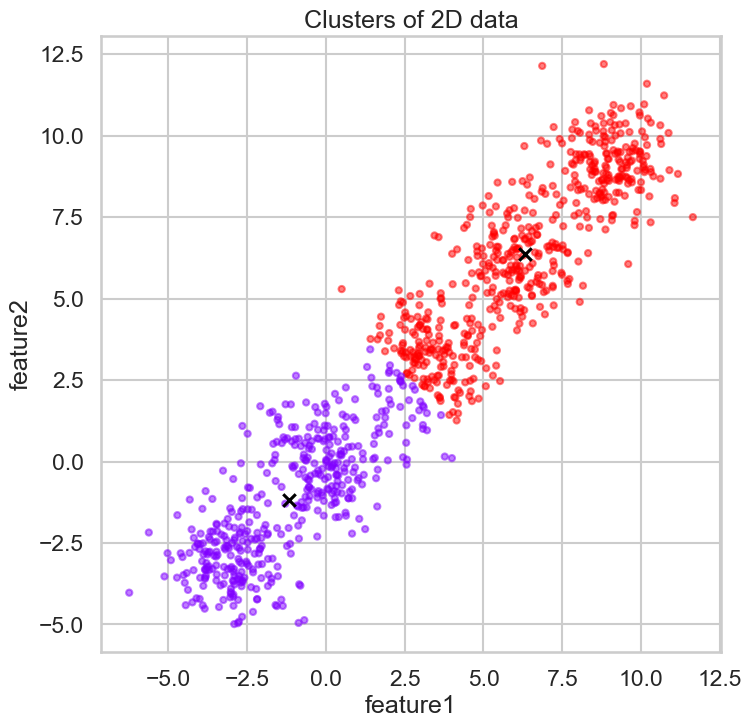

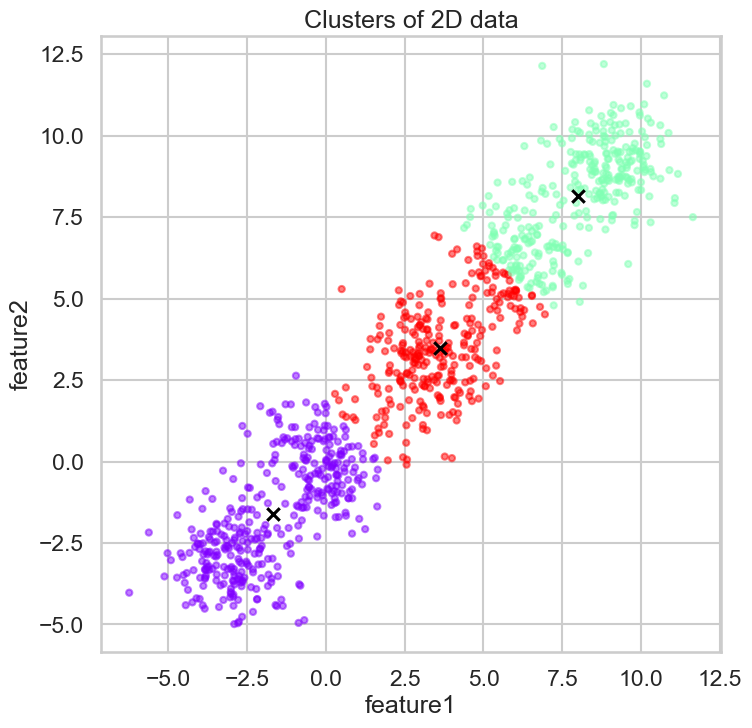

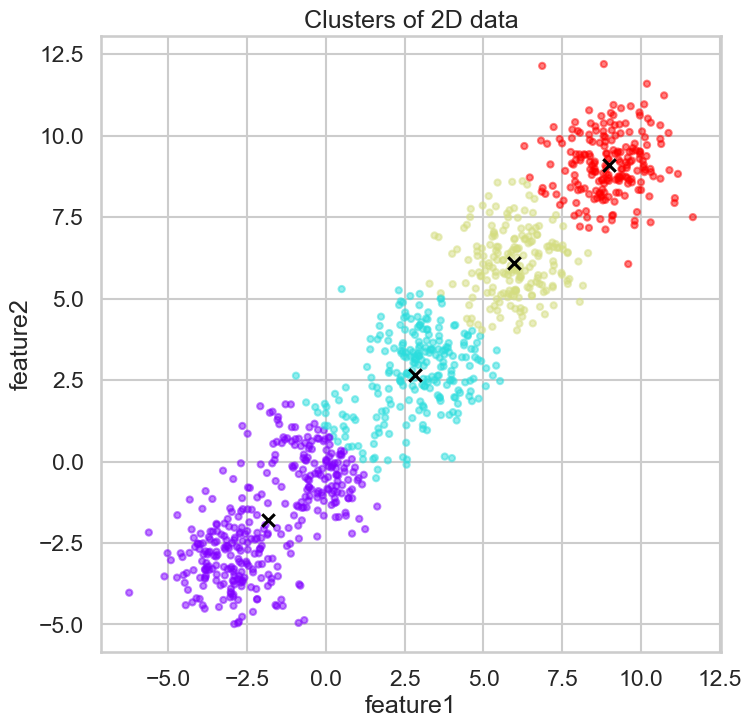

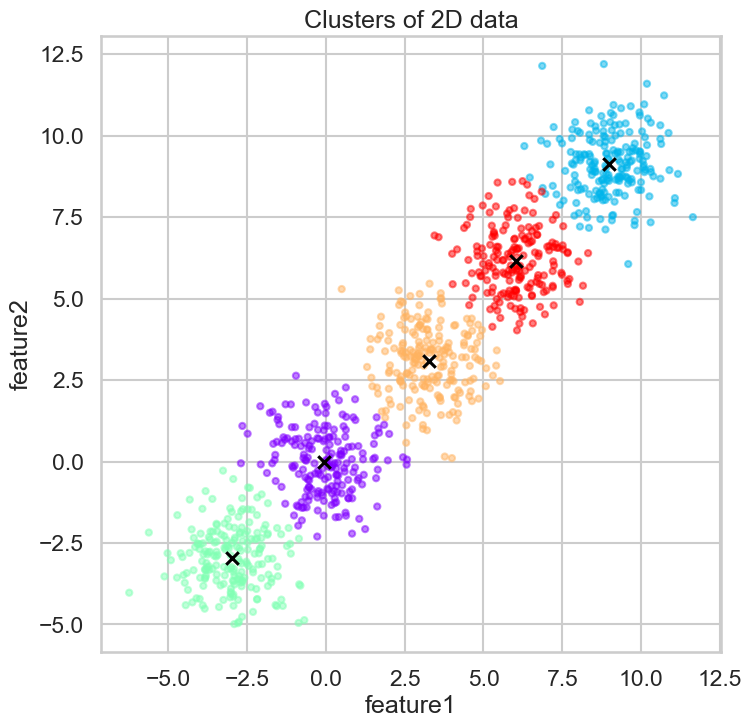

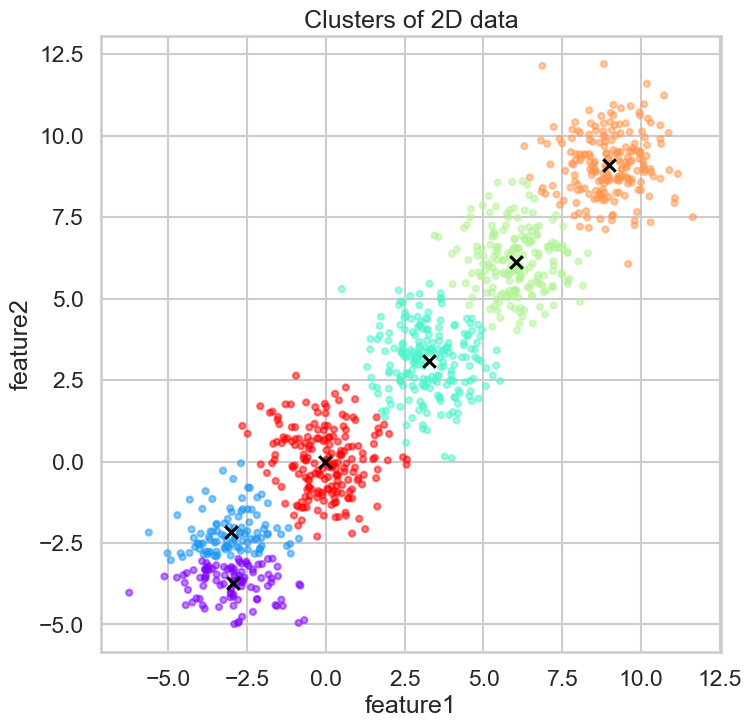

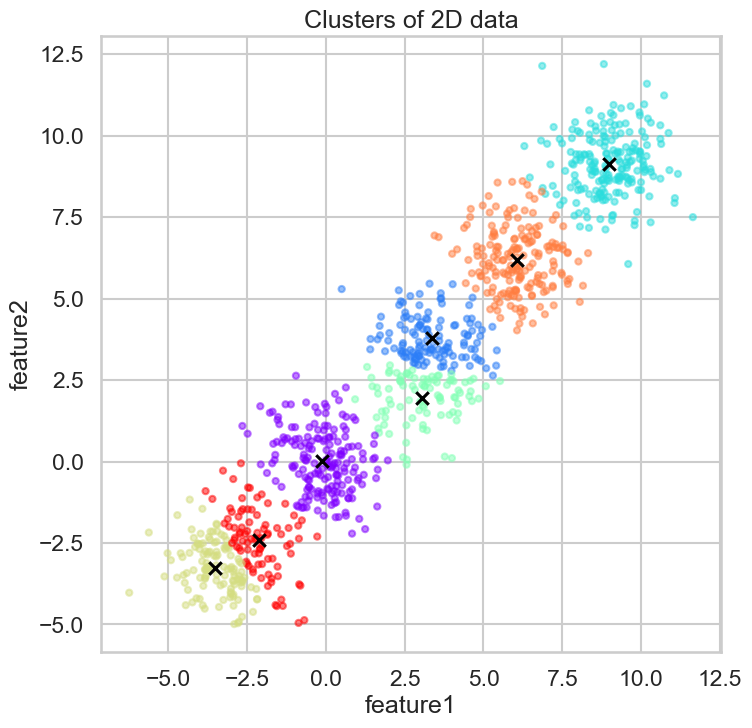

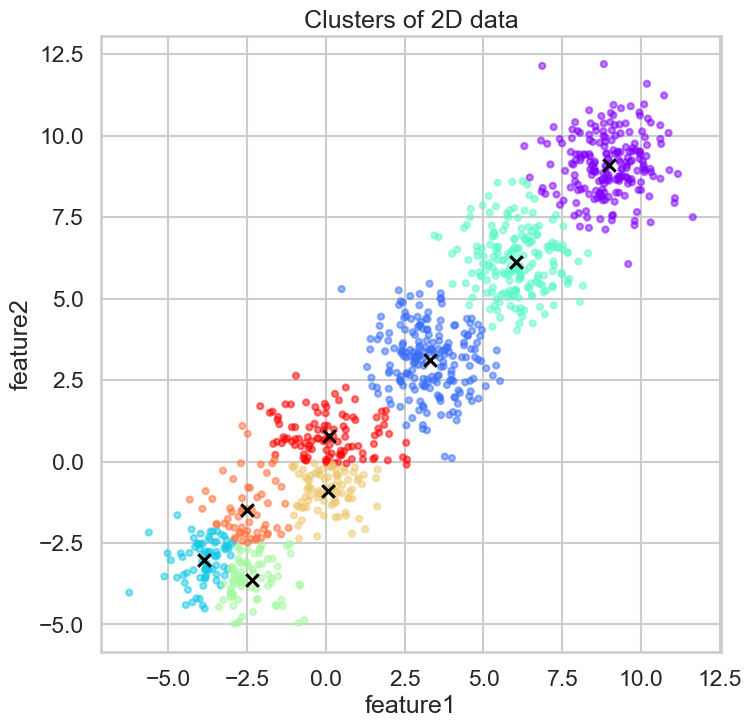

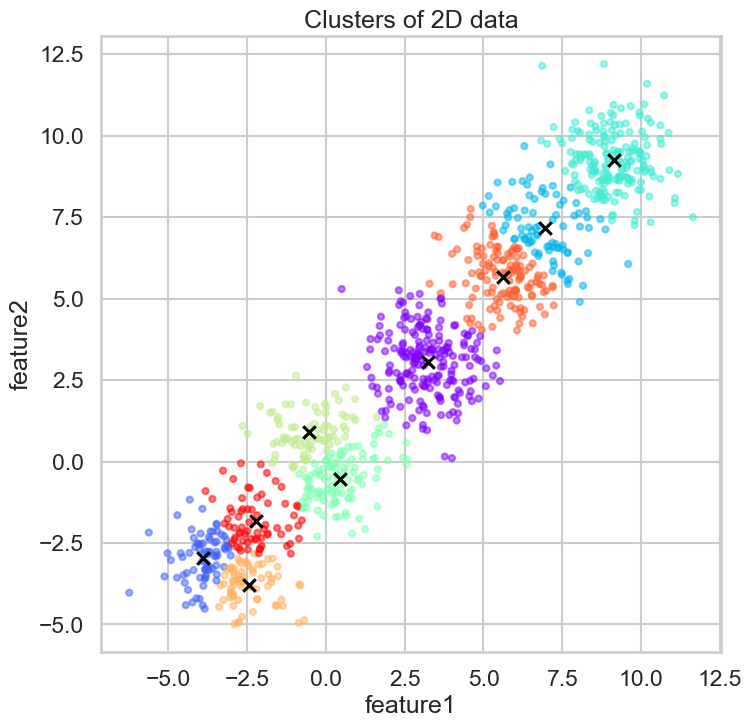

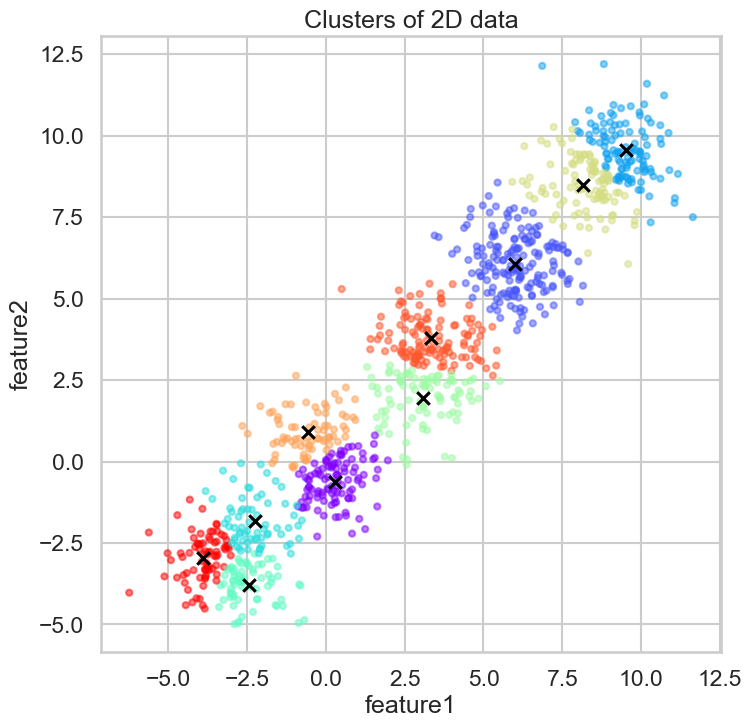

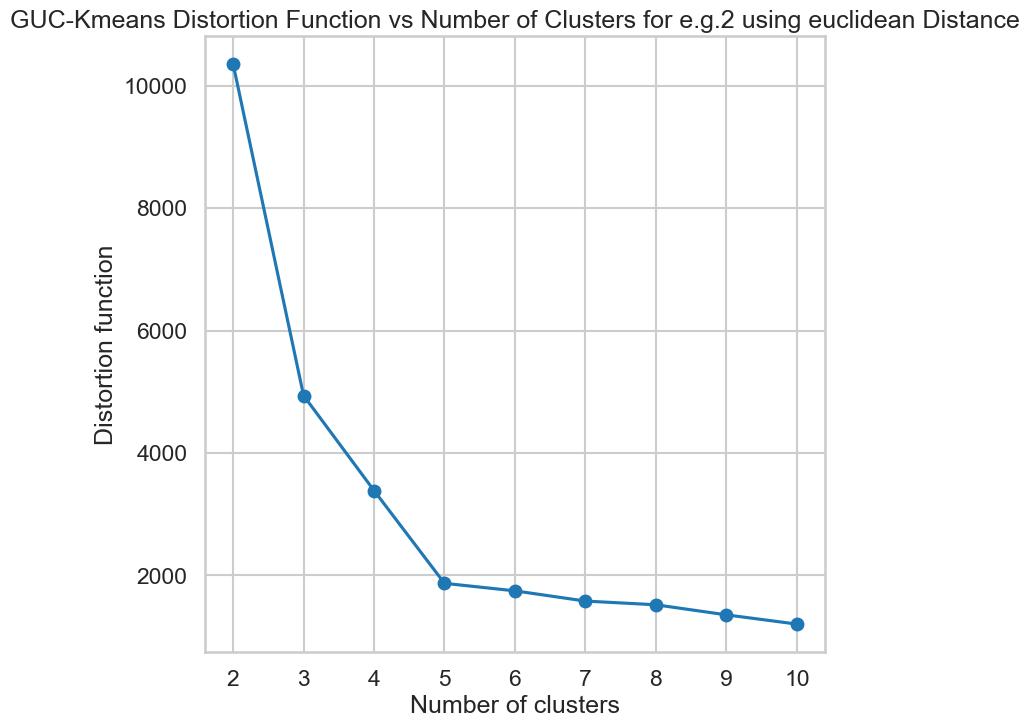

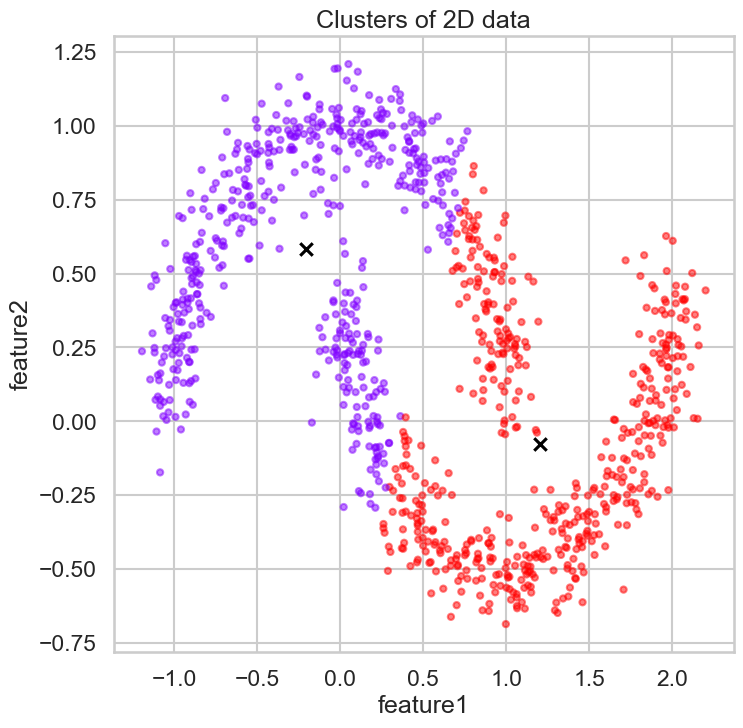

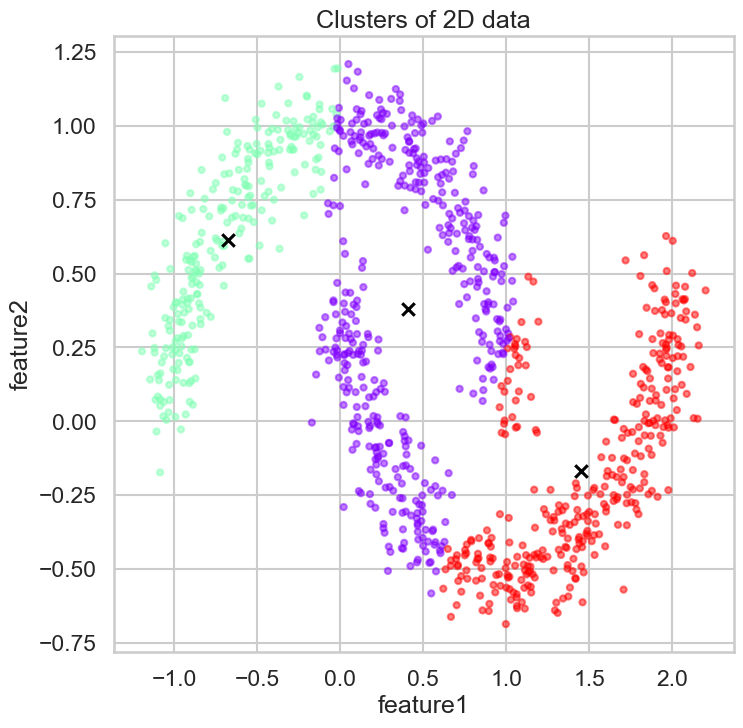

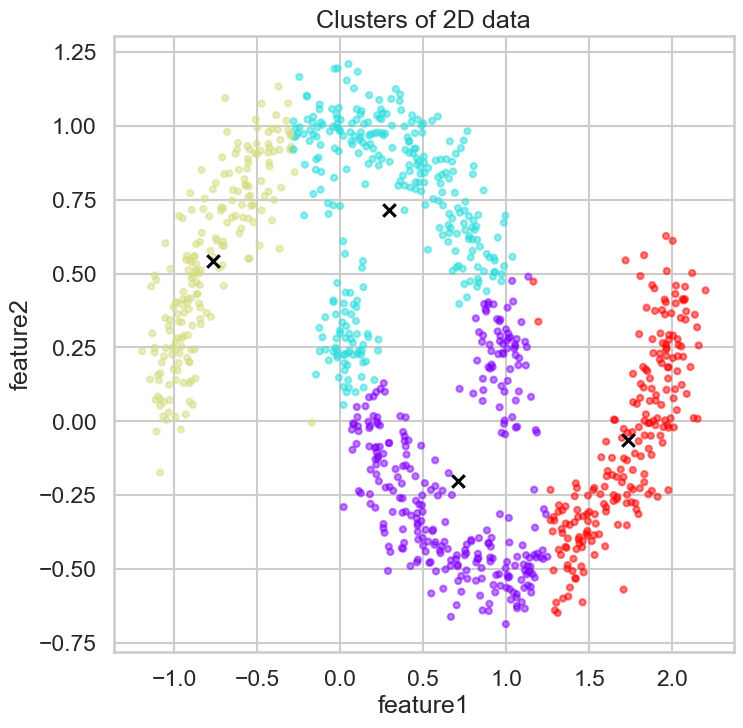

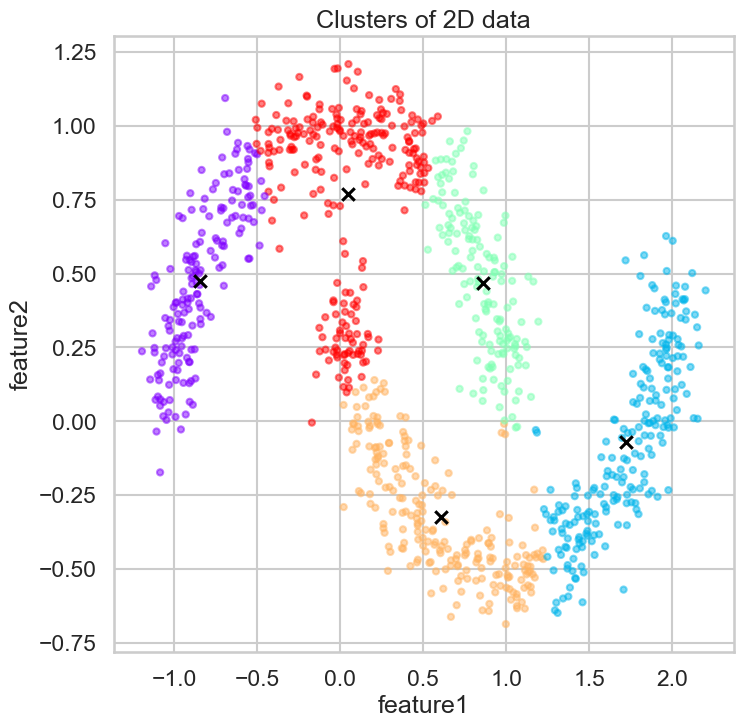

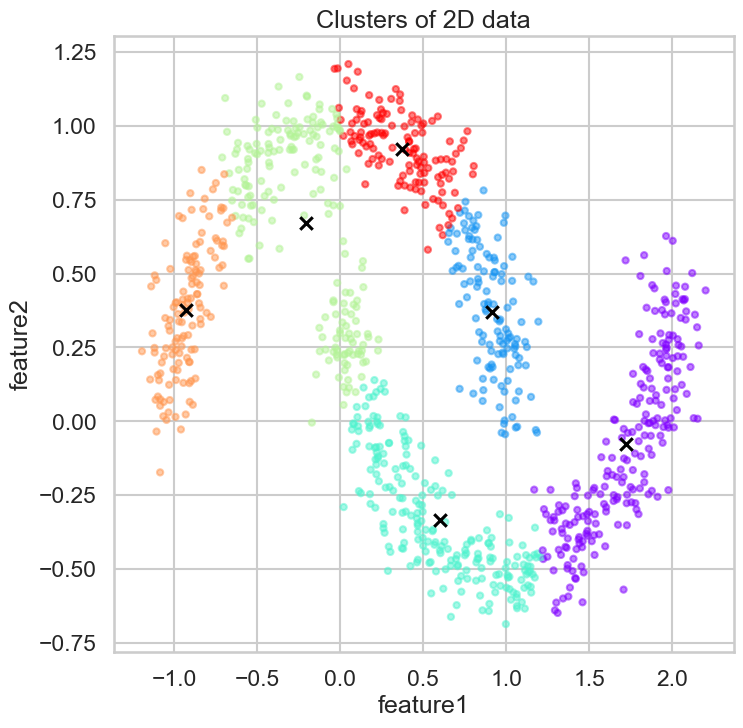

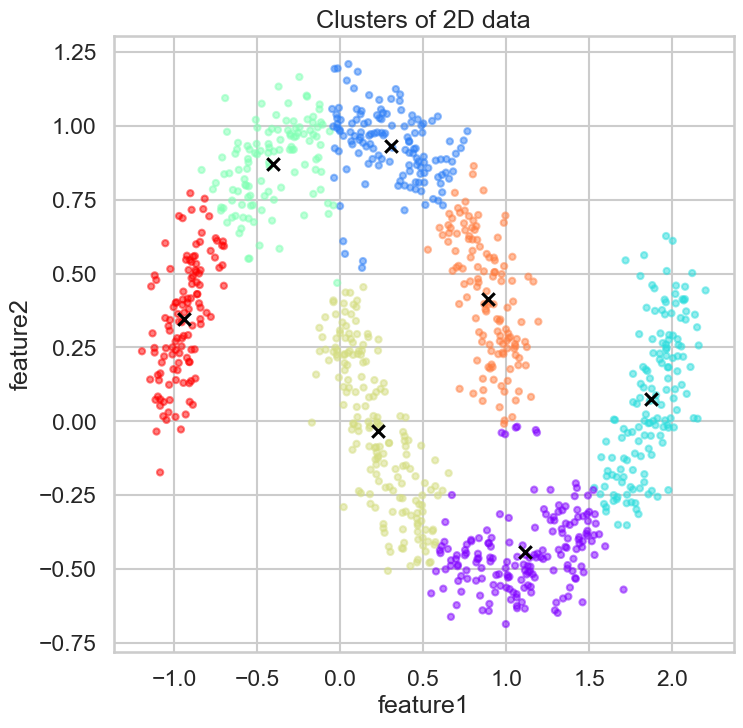

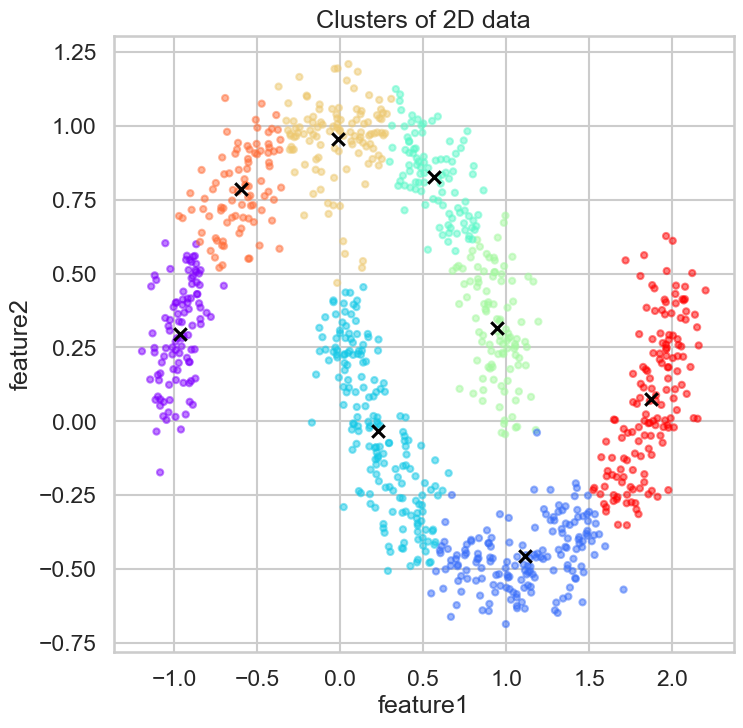

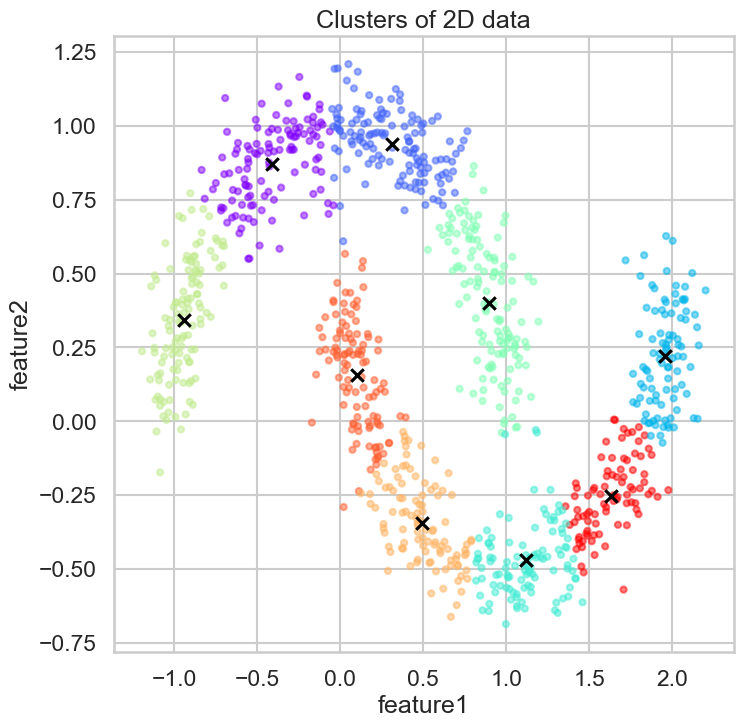

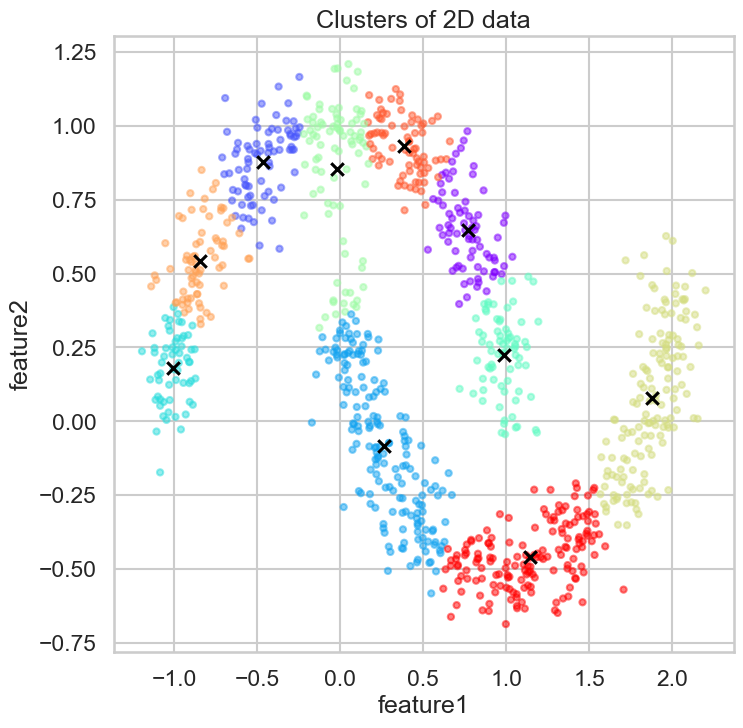

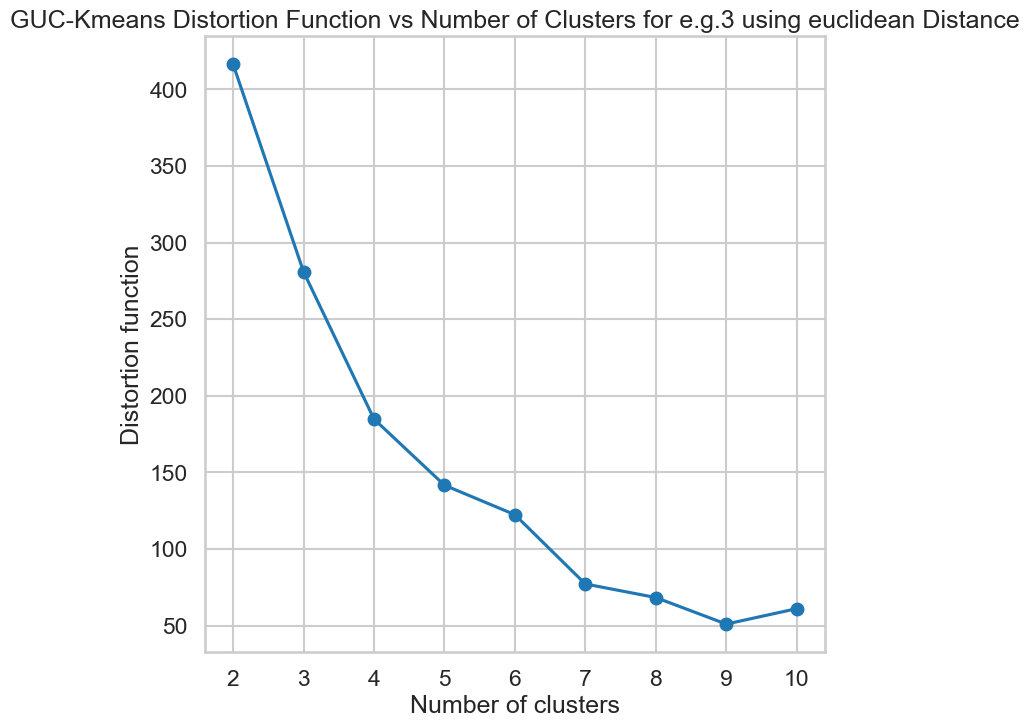

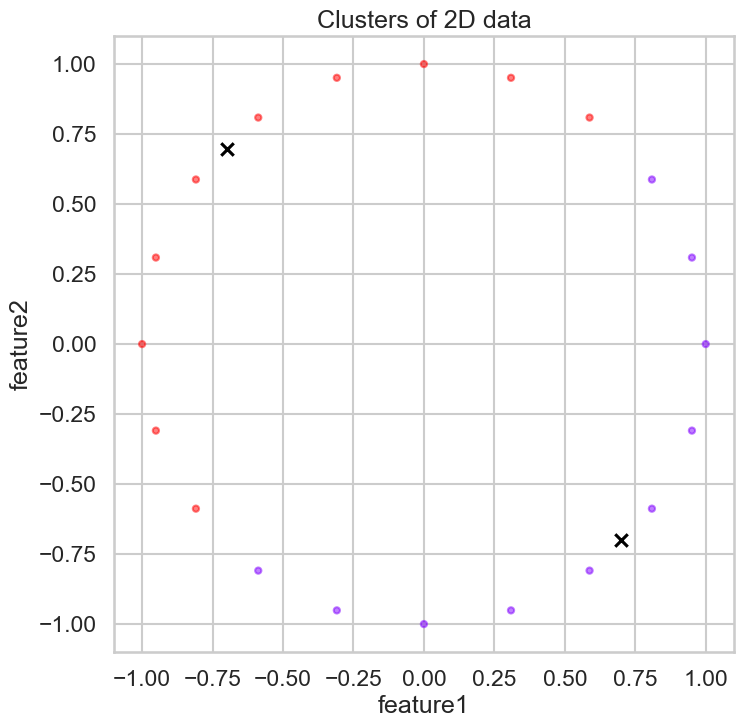

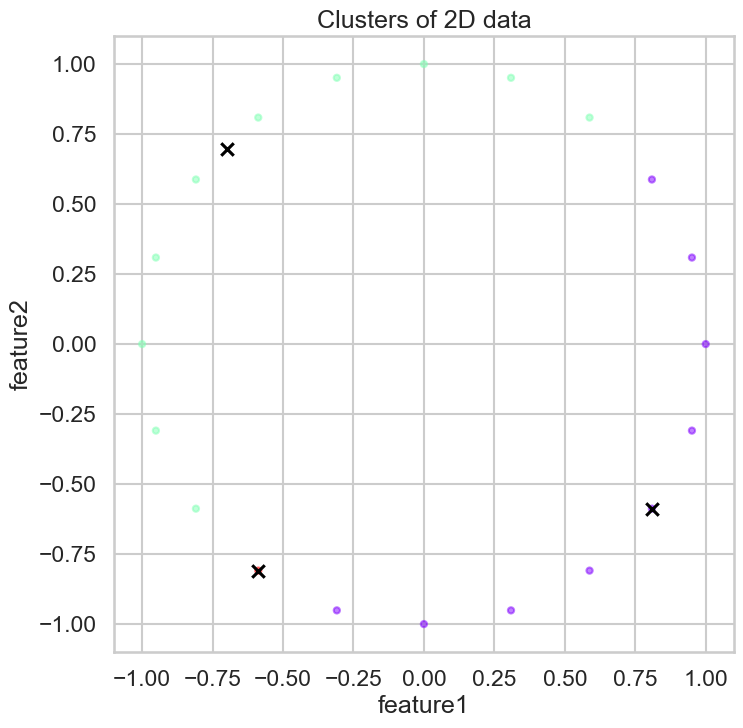

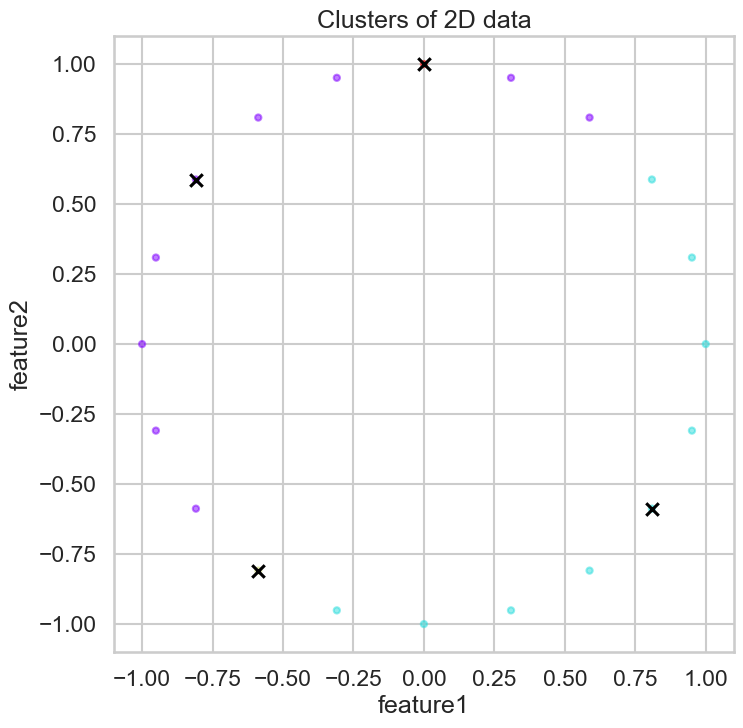

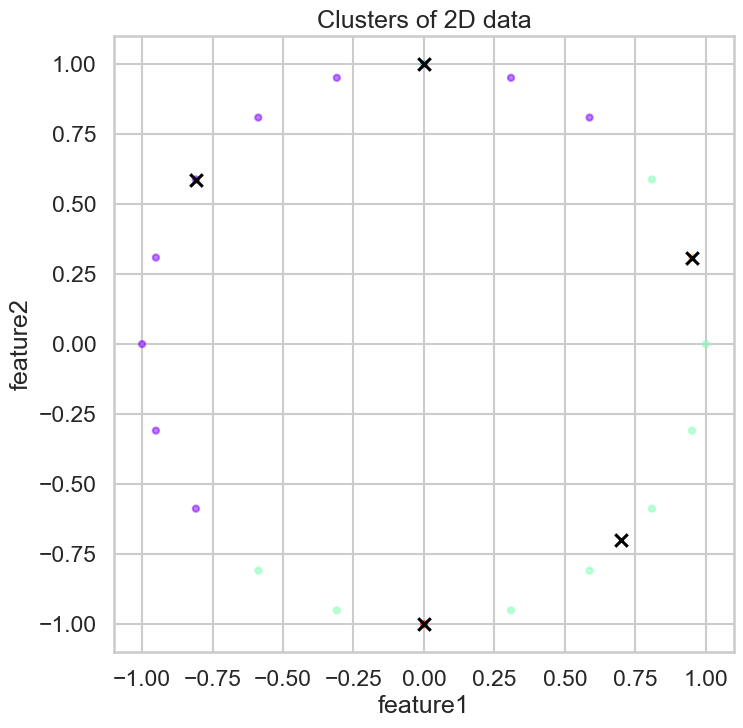

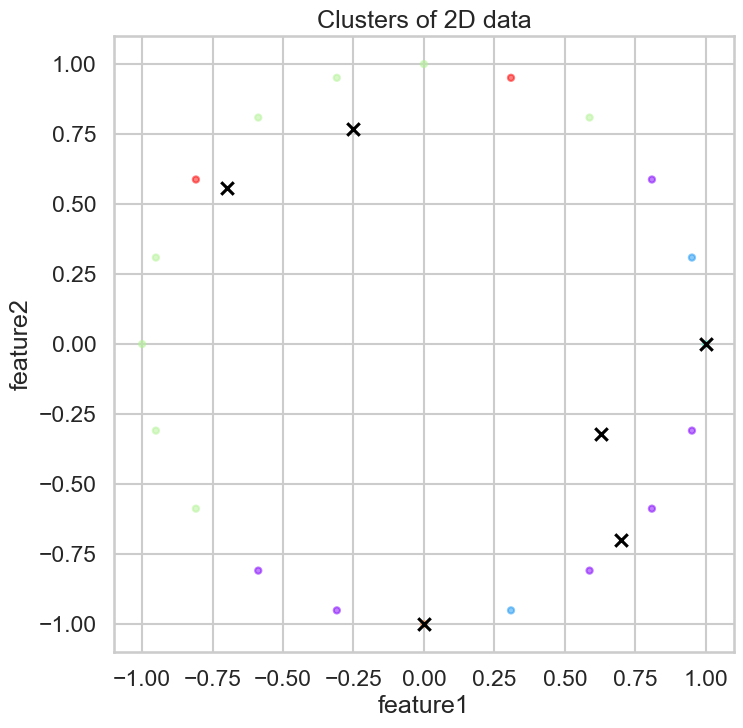

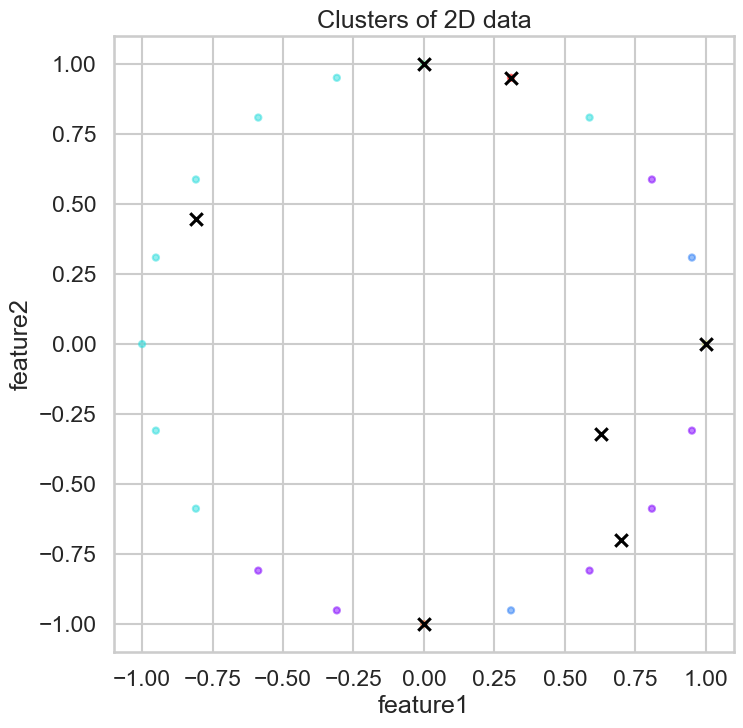

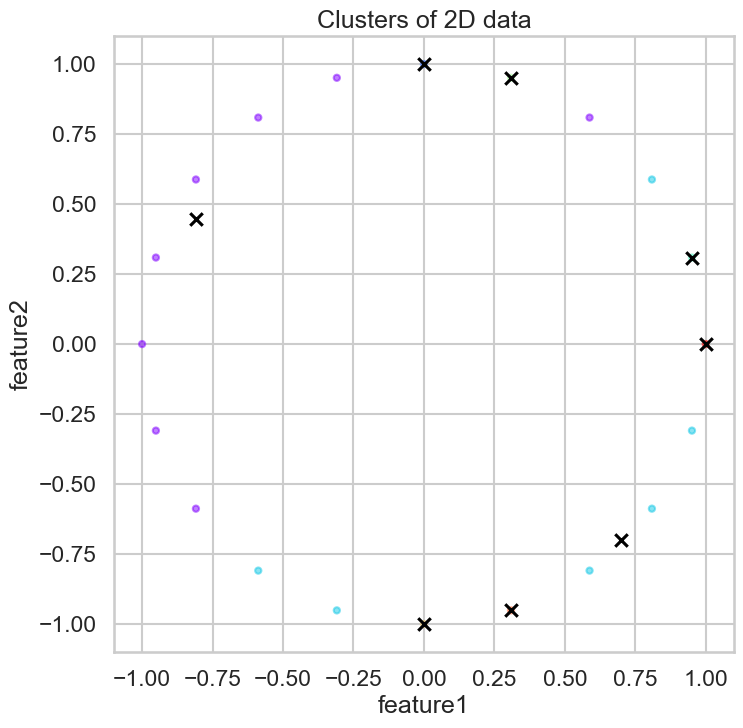

KeyboardInterrupt: 

In [14]:
datalist=[X1,X2,X3]
distance=["euclidean","pearson"]
for j in range(2):
    dist_type = distance[j]    
    for i in range(3):
        X = datalist[i]
        # Set the style and context
        sns.set_style("whitegrid")
        sns.set_context("talk")

        # Define the range of K values
        K_range = range(2, 11)

        # Create an empty list to store the distortion function values
        Distortion_list = []
        
        # Loop over the K values
        for K in K_range:
            # Apply the GUC_Kmean function
            #[ Cluster_Labels, Cluster_Centroids, Final_Cluster_Distance, Cluster_Metric ]
            '''
            arr = GUC_Kmean(X, K, dist_type)
            Cluster_Labels = arr[0]
            Cluster_Centroids = arr[1]
            Distortion = arr[-1]
            '''
            # Display the results using the display_cluster function
            Distortion=plot_clusters_2D(data=X,n_clusters=K,distance_type=dist_type)
            # Print the distortion function value
            #print(f"Distortion for K = {K} is {Distortion:.2f}")
            # Append the distortion function value to the list
            Distortion_list.append(Distortion)
        
        # Create a line plot of the distortion function versus the K values
        plt.plot(K_range, Distortion_list, marker='o')
        # Set the x and y labels
        plt.xlabel("Number of clusters")
        plt.ylabel("Distortion function")
        plt.title(f"GUC-Kmeans Distortion Function vs Number of Clusters for e.g.{i+1} using {dist_type} Distance")
        # Show the plot
        plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

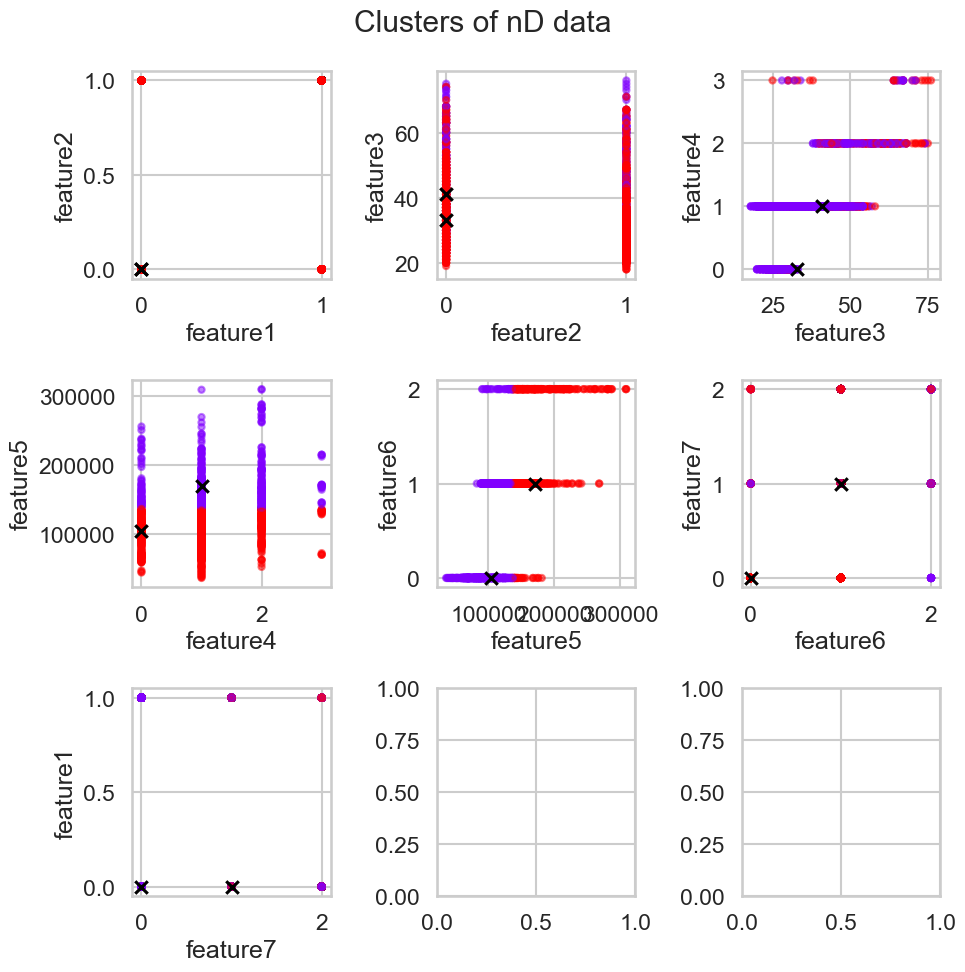

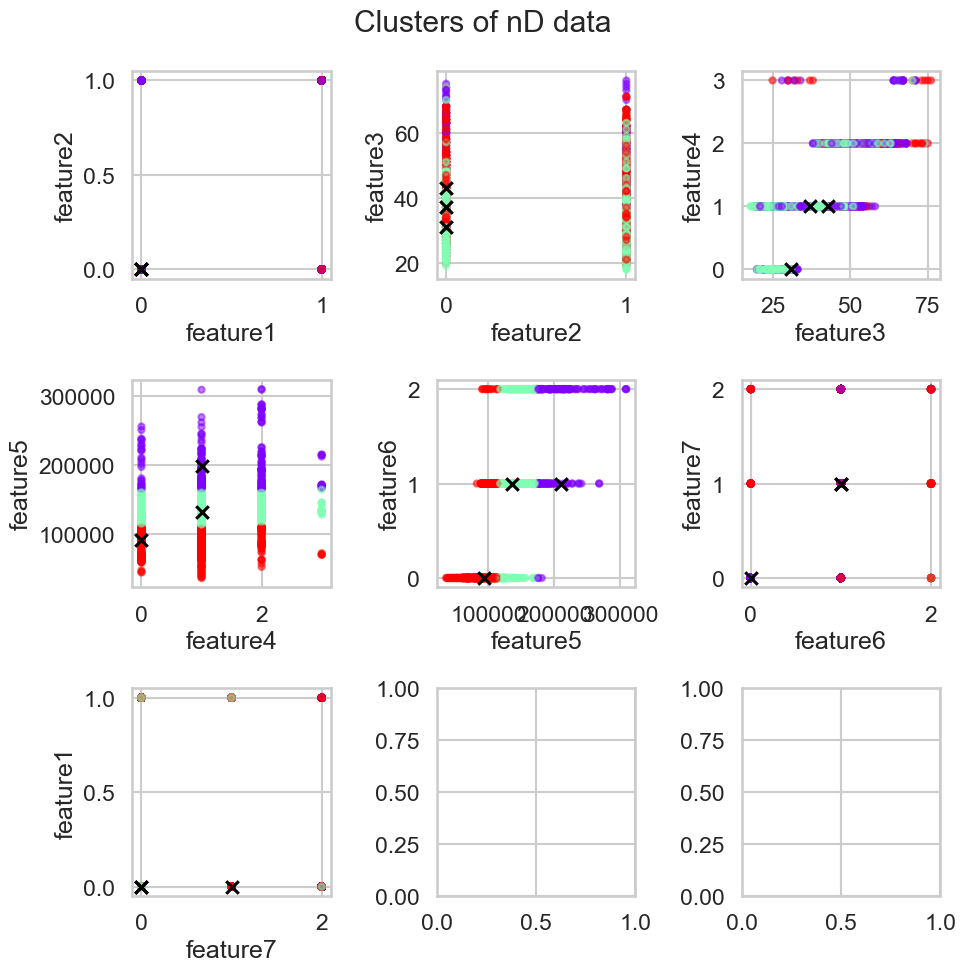

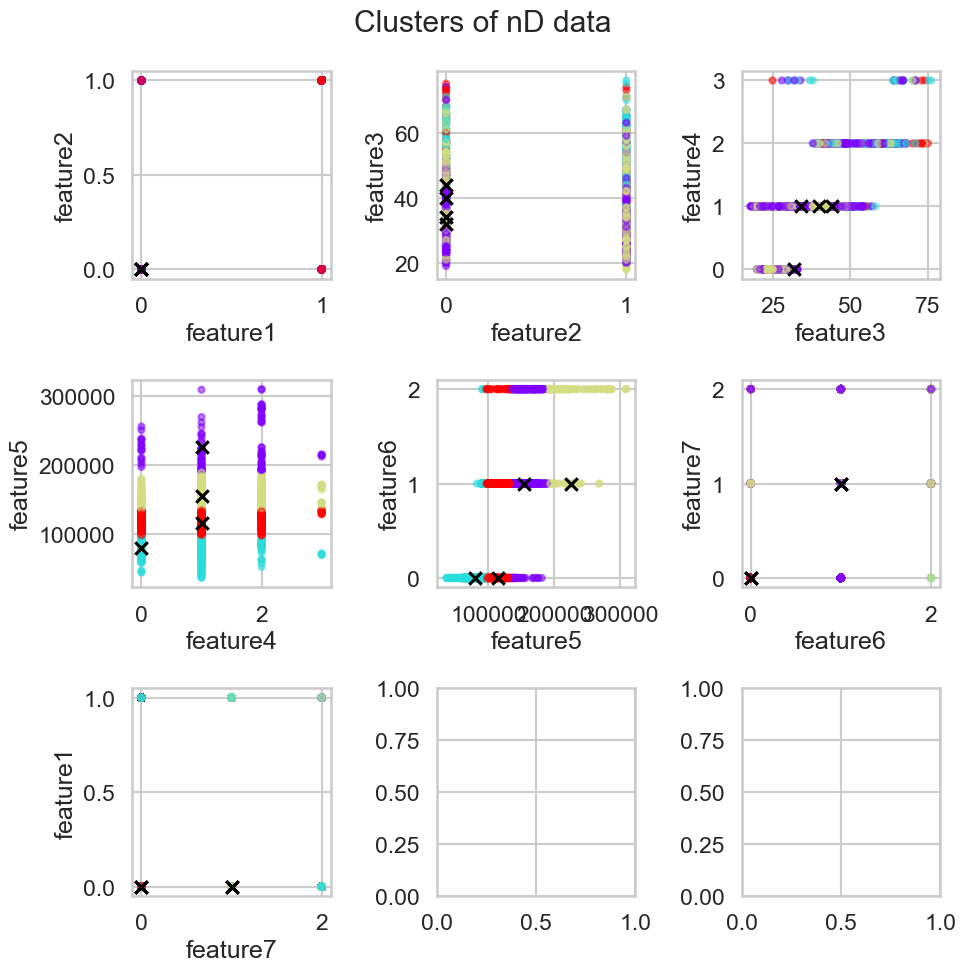

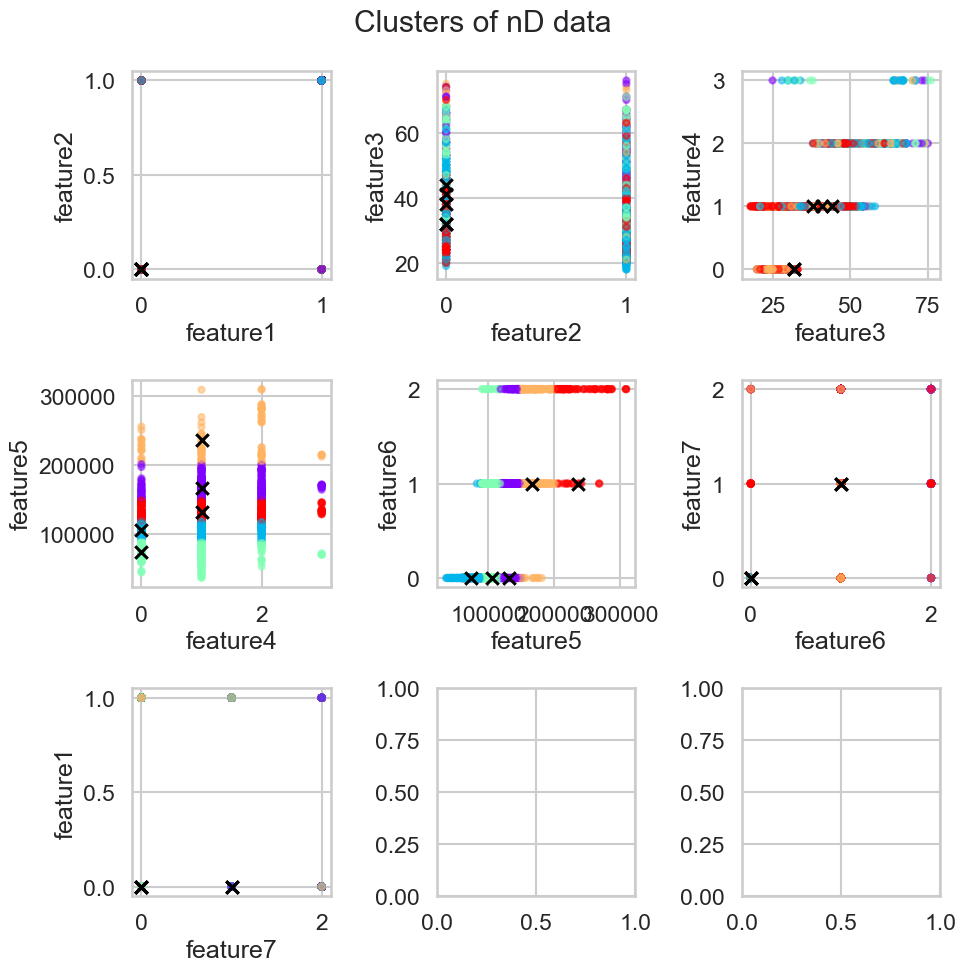

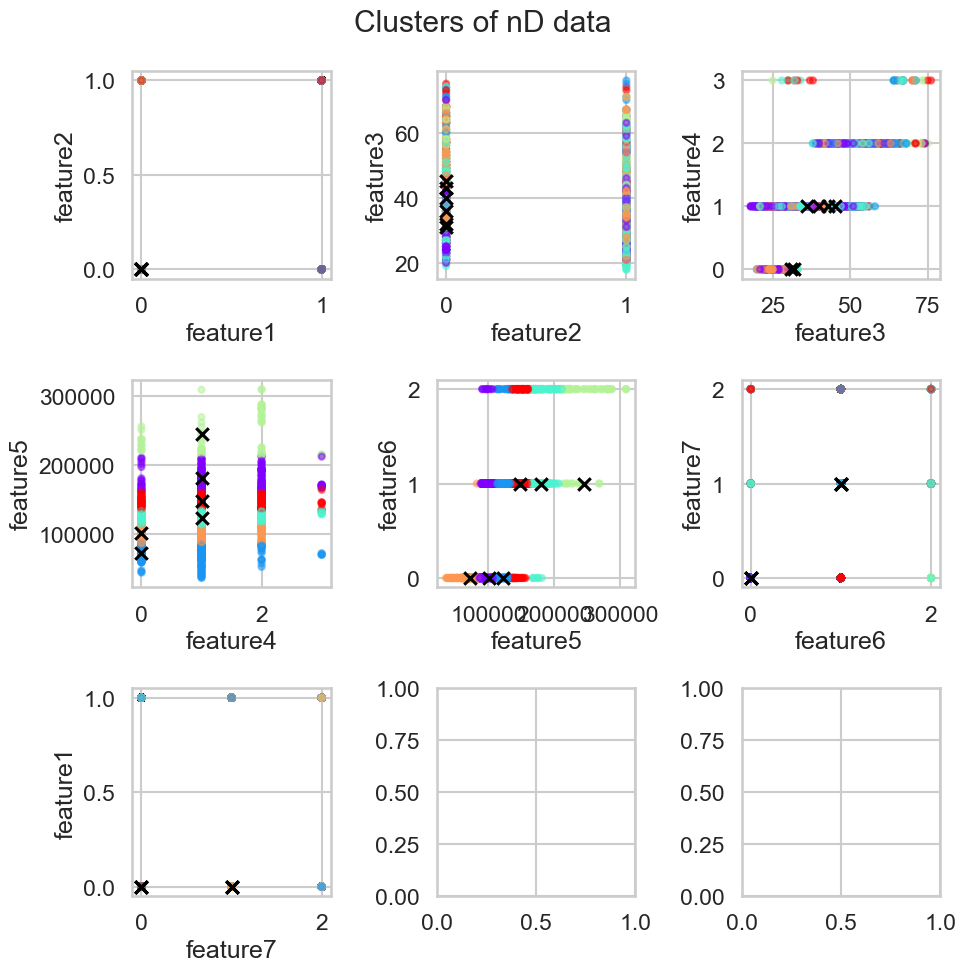

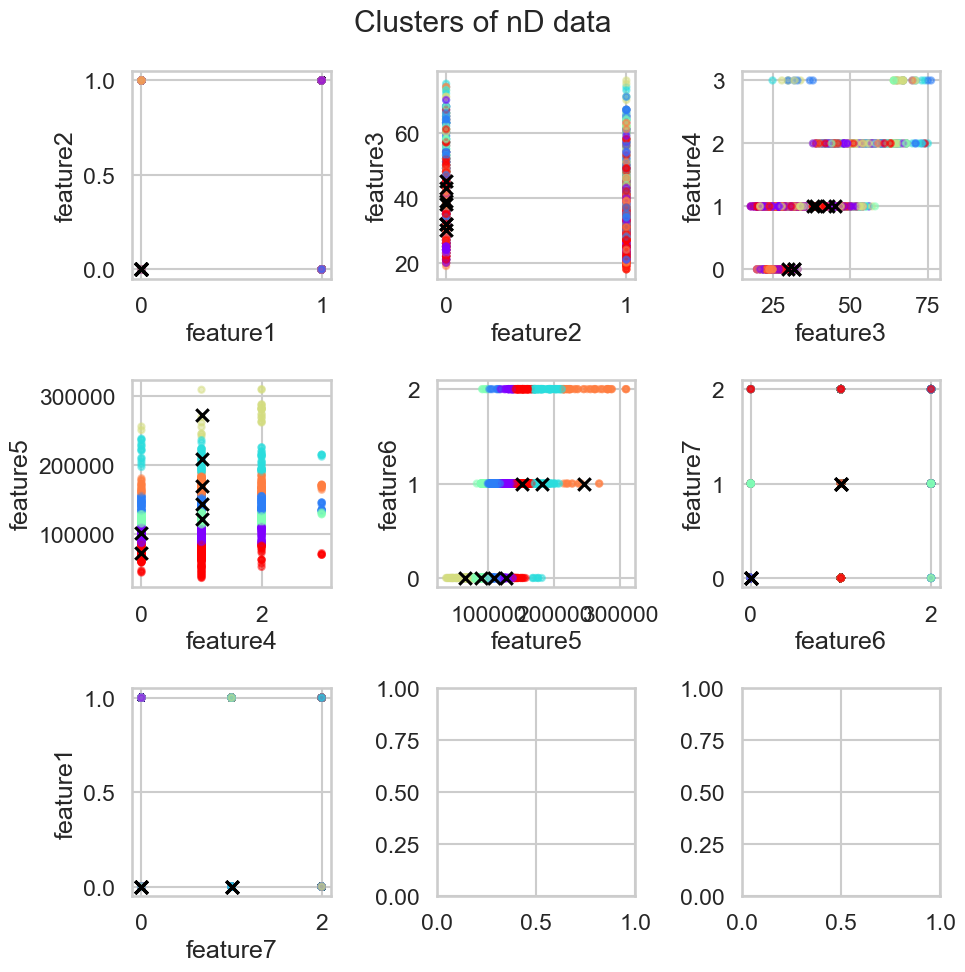

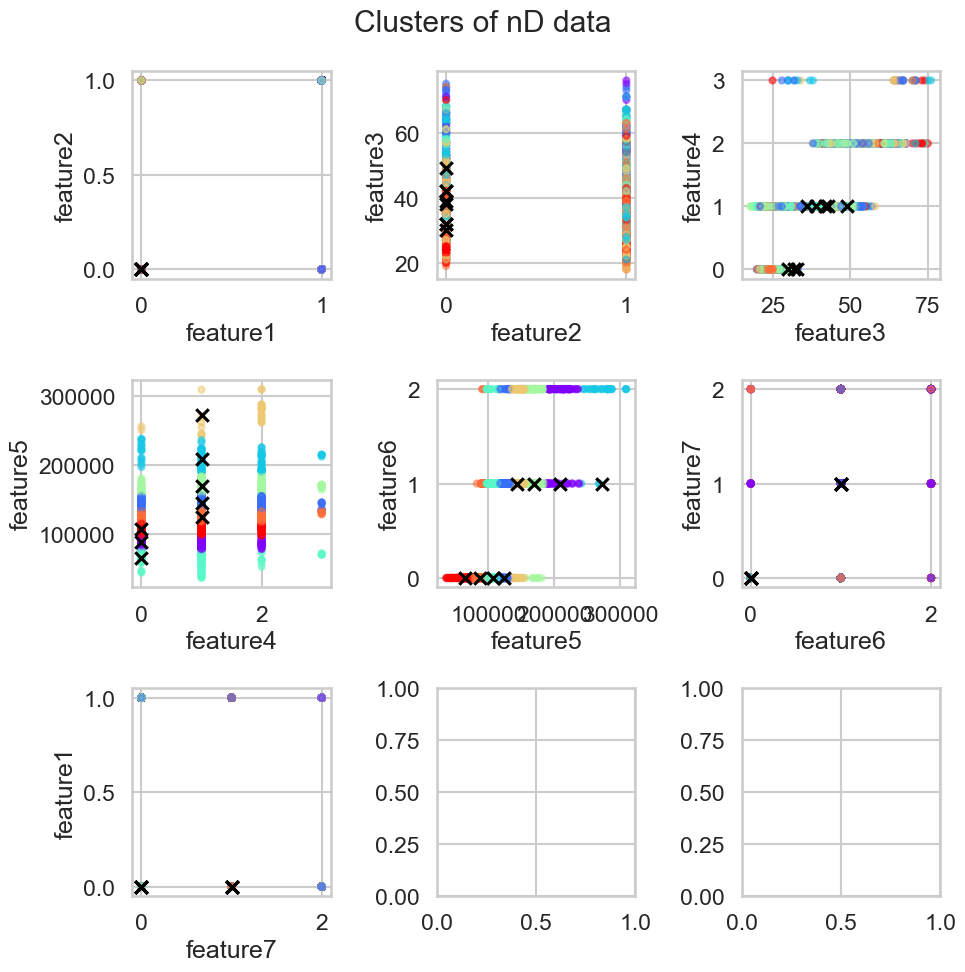

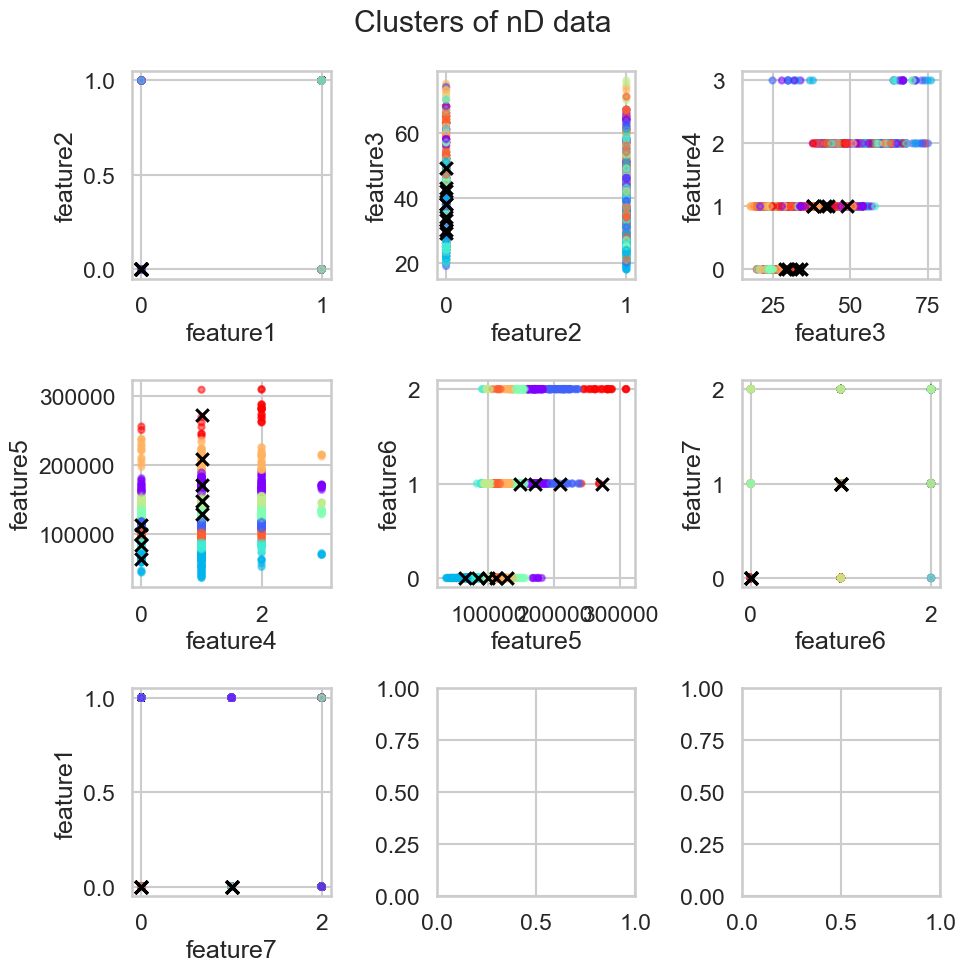

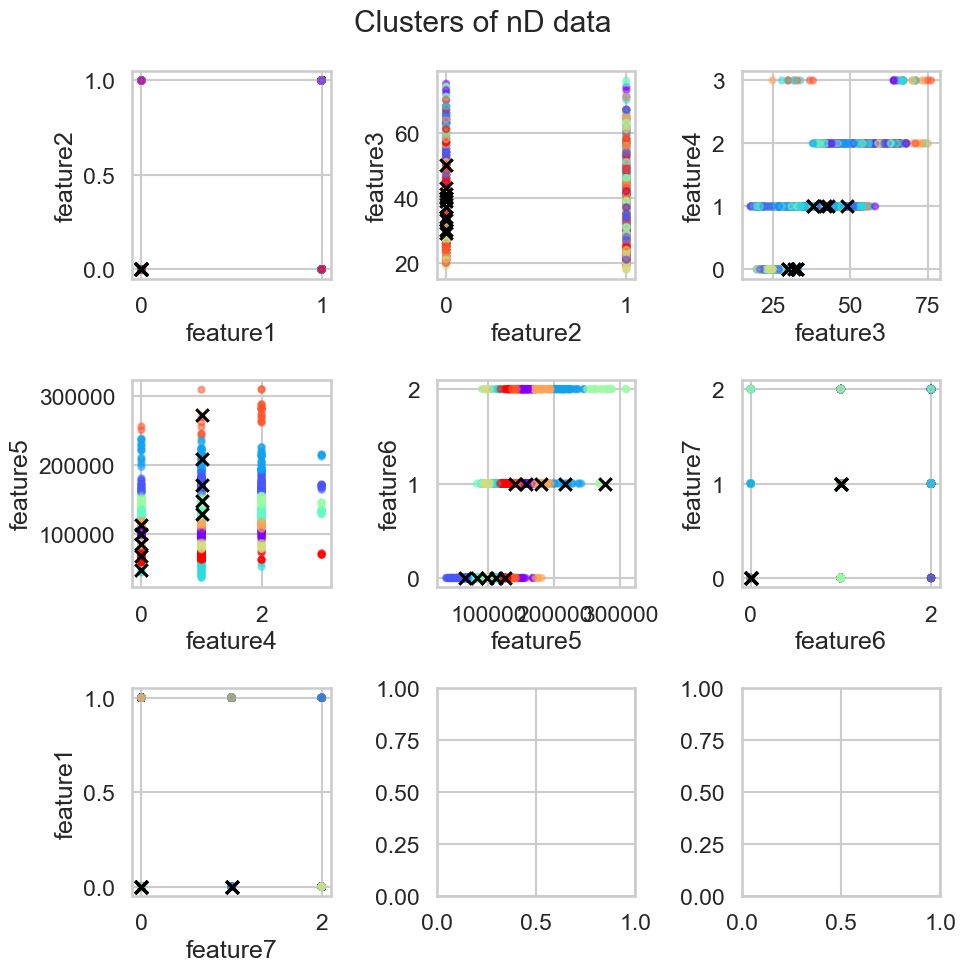

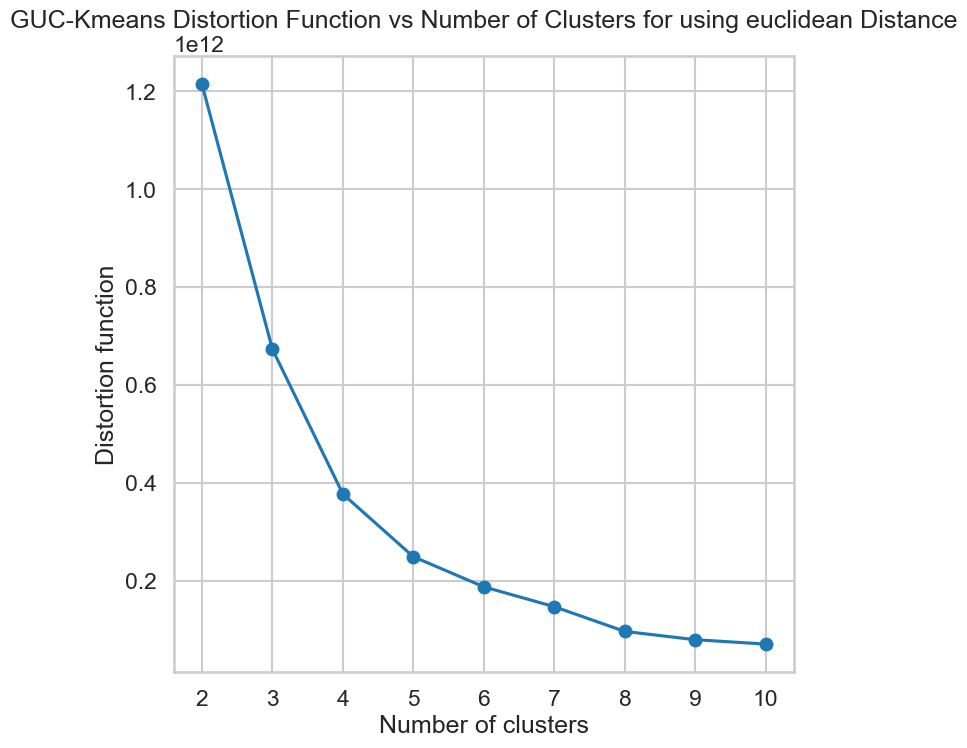

KeyboardInterrupt: 

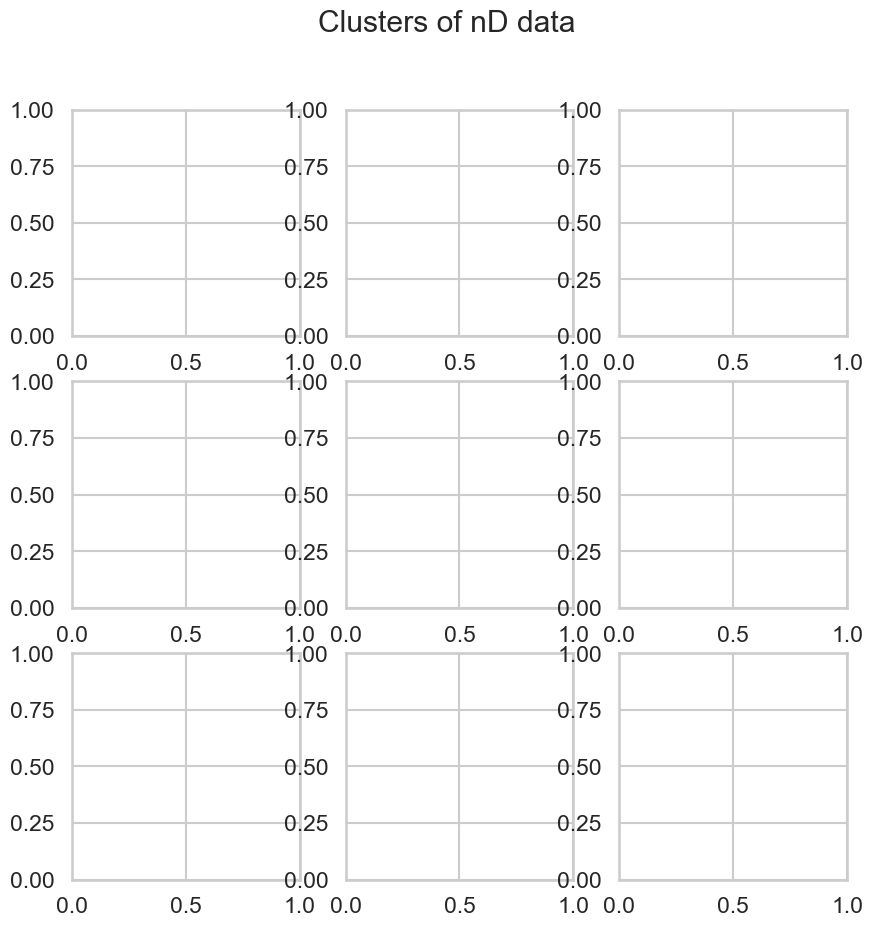

In [15]:
distance=["euclidean","pearson"]
for j in range(2):
    dist_type = distance[j]    
    # Set the style and context
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # Define the range of K values
    K_range = range(2, 11)

    # Create an empty list to store the distortion function values
    Distortion_list = []
    
    # Loop over the K values
    for K in K_range:
        # Display the results using the display_cluster function
        Distortion=plot_clusters_nD(data=data_points,n_clusters=K,distance_type=dist_type)
        # Append the distortion function value to the list
        Distortion_list.append(Distortion)

    # Create a line plot of the distortion function versus the K values
    plt.plot(K_range, Distortion_list, marker='o')
    # Set the x and y labels
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion function")
    plt.title(f"GUC-Kmeans Distortion Function vs Number of Clusters for using {dist_type} Distance")
    # Show the plot
    plt.show()

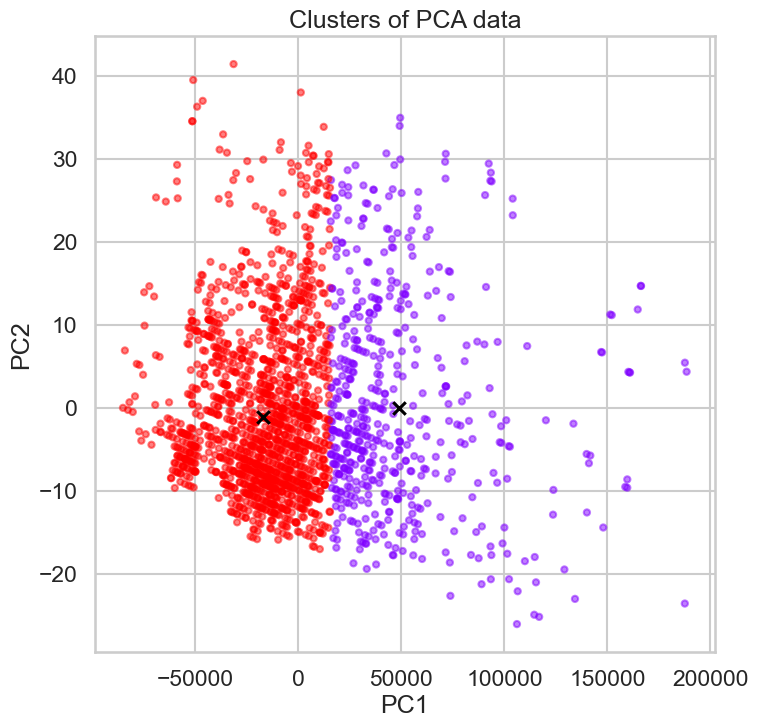

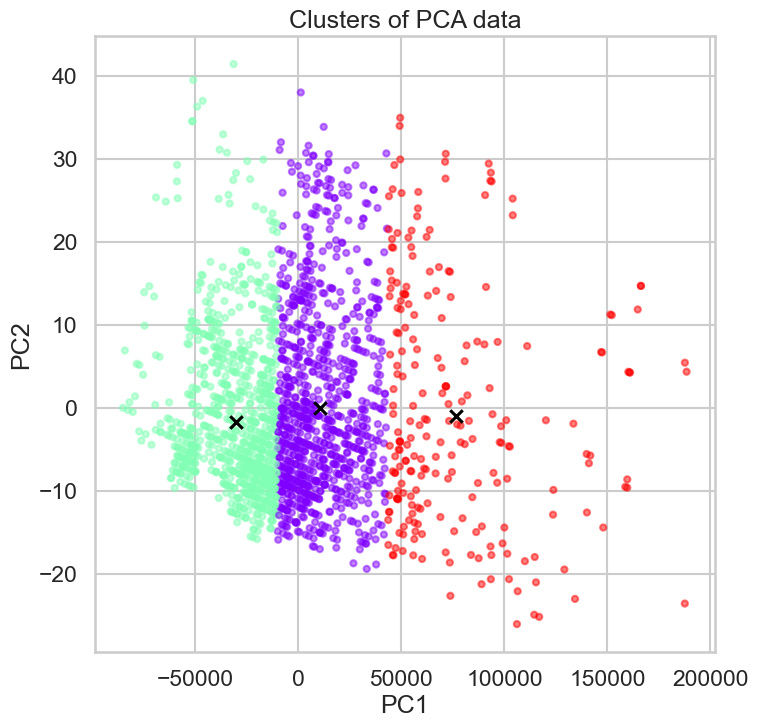

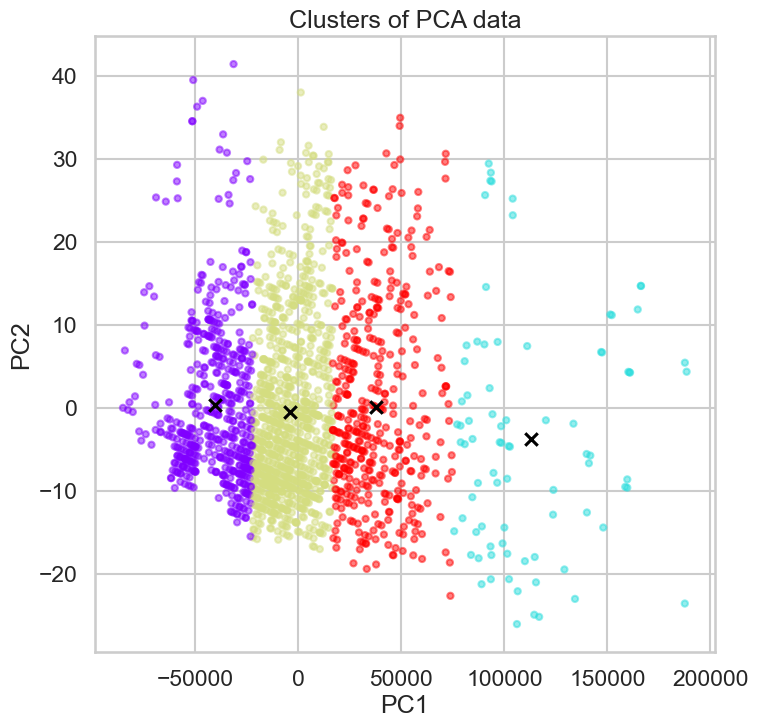

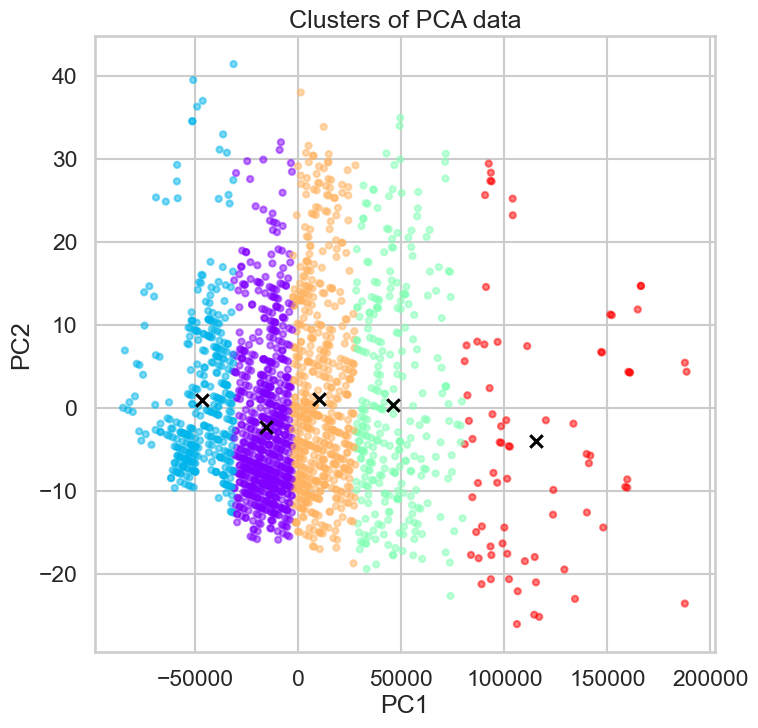

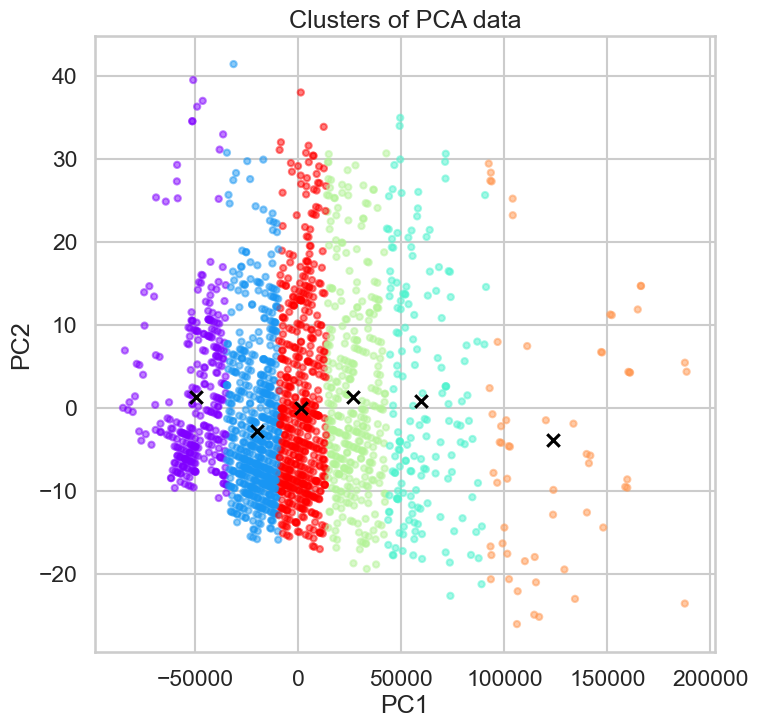

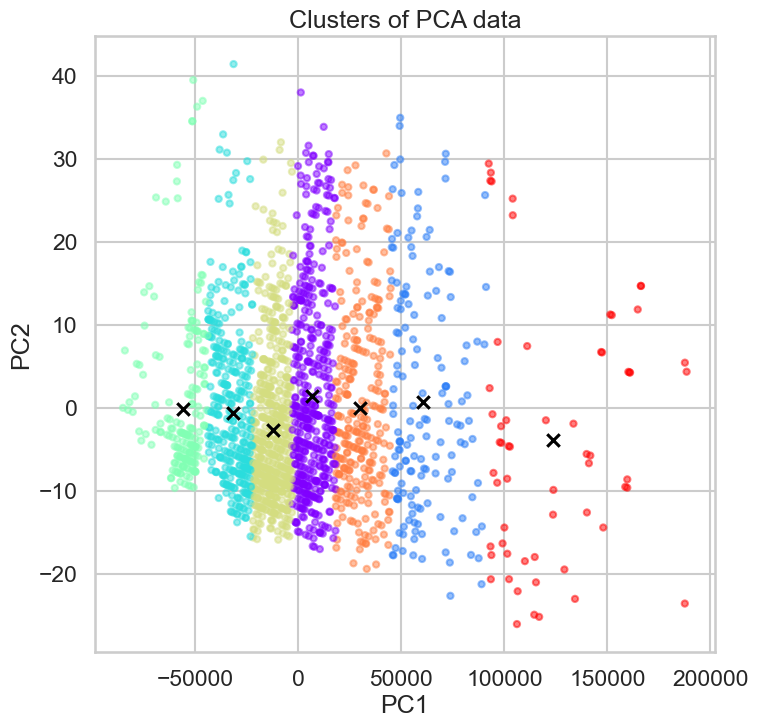

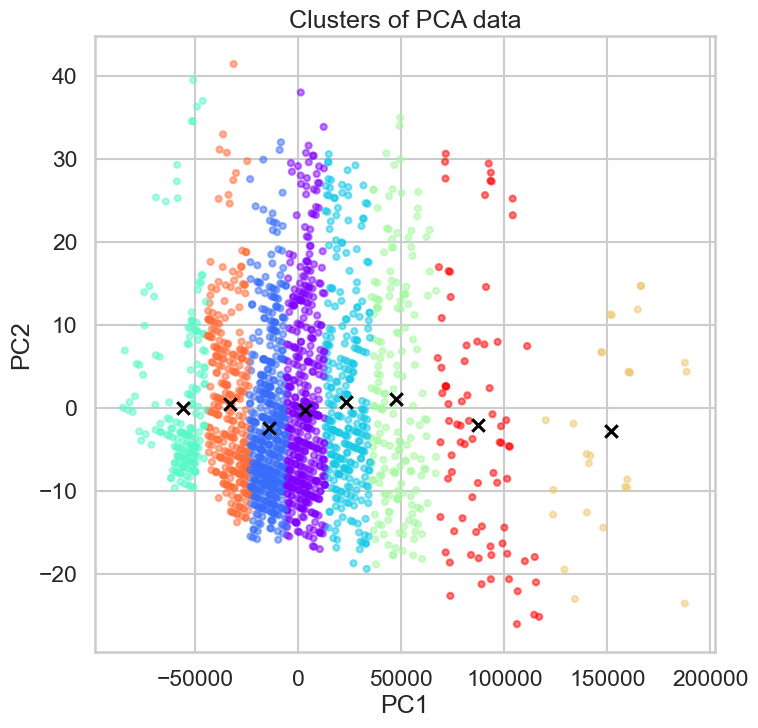

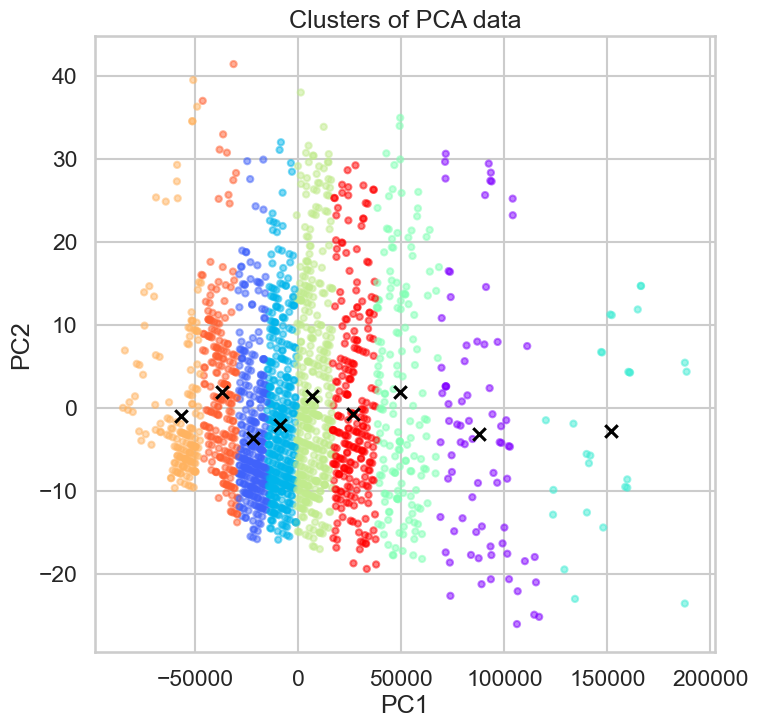

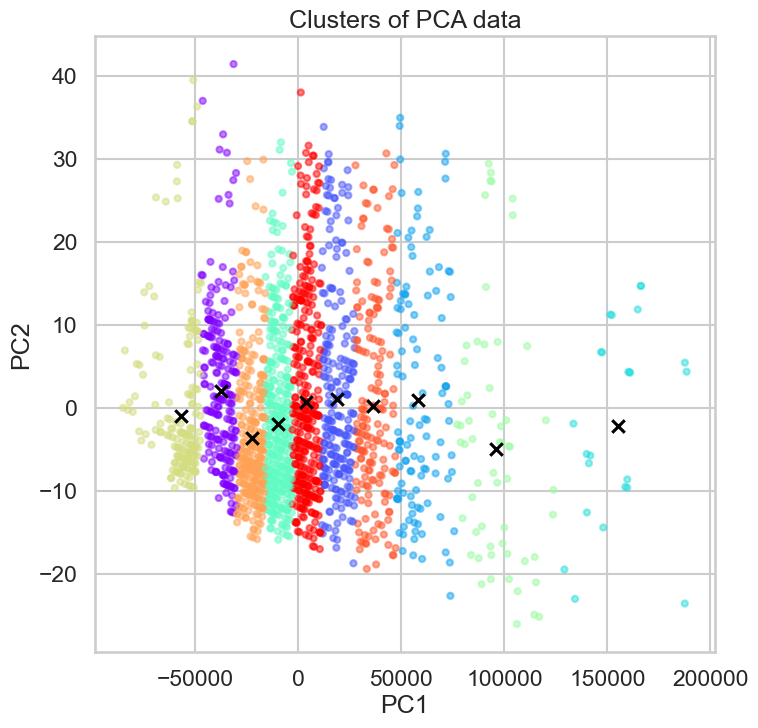

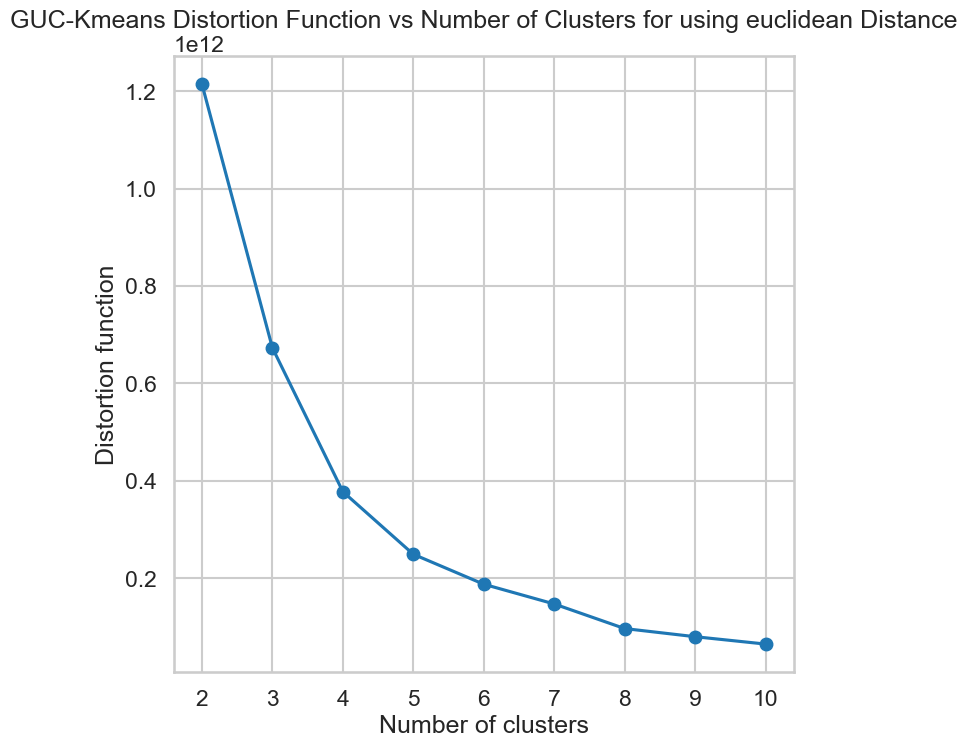

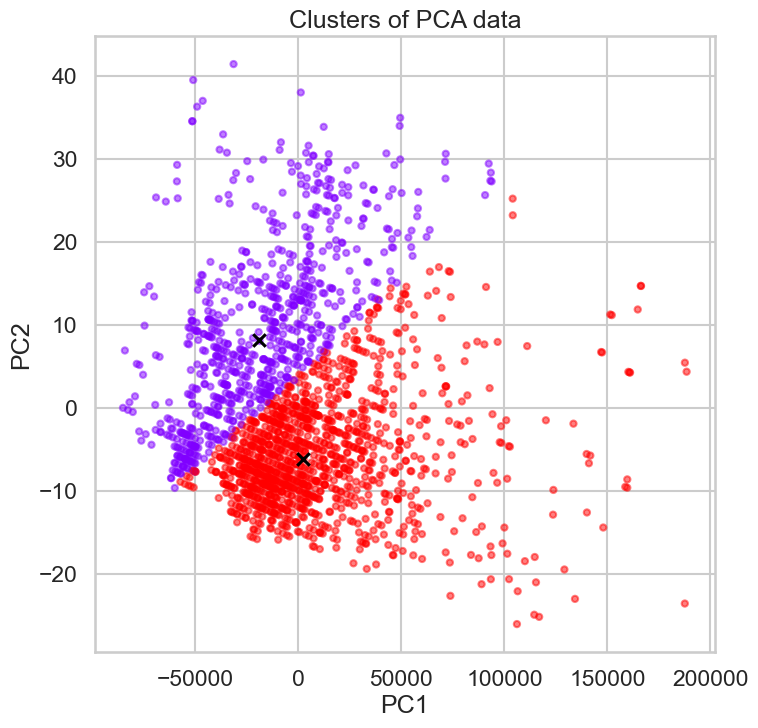

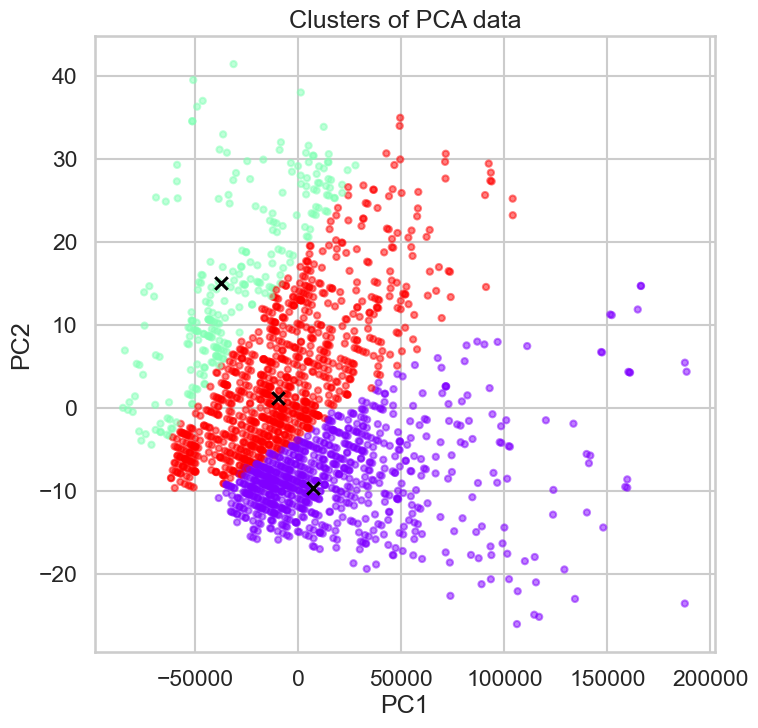

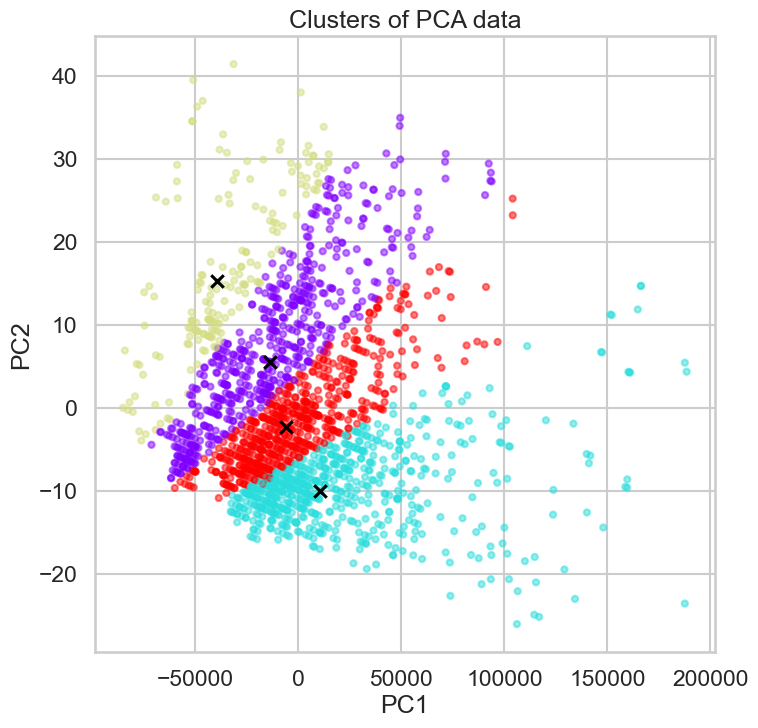

KeyboardInterrupt: 

In [16]:
distance=["euclidean","pearson"]
for j in range(2):
    dist_type = distance[j]    
    # Set the style and context
    sns.set_style("whitegrid")
    sns.set_context("talk")

    # Define the range of K values
    K_range = range(2, 11)

    # Create an empty list to store the distortion function values
    Distortion_list = []
    
    # Loop over the K values
    for K in K_range:
        # Display the results using the display_cluster function
        Distortion=plot_clusters_PCA(data=data_points,n_clusters=K,distance_type=dist_type)
        # Append the distortion function value to the list
        Distortion_list.append(Distortion)

    # Create a line plot of the distortion function versus the K values
    plt.plot(K_range, Distortion_list, marker='o')
    # Set the x and y labels
    plt.xlabel("Number of clusters")
    plt.ylabel("Distortion function")
    plt.title(f"GUC-Kmeans Distortion Function vs Number of Clusters for using {dist_type} Distance")
    # Show the plot
    plt.show()

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist

# Your data
data = data_points  # replace with your data

# Compute pairwise Pearson correlation matrix
corr_matrix = np.corrcoef(data.T)

# Convert correlation matrix to distance matrix
dist_matrix = np.sqrt(2 * (1 - corr_matrix))

# Use k-means with the distance matrix
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(dist_matrix)
kmeans.labels_

ValueError: n_samples=7 should be >= n_clusters=8.

In [ ]:
np.bincount(GUC_Kmean(data_points,6,'pearson')[0])

Pearson distance is not recommended to be used in K-means because it does not comply with the objective function of K-means, which is to minimize the sum of squared deviations from the cluster centroids. Pearson distance is based on the correlation coefficient, which measures the linear relationship between two variables, not their absolute difference. Pearson distance also has some drawbacks, such as:

- It is not defined when the variance of either variable is zero.
- It is sensitive to outliers and non-linear relationships.
- It does not span Euclidean space, which means the arithmetic mean of the cluster points may not be a valid centroid.

Therefore, using Pearson distance in K-means may lead to unstable or meaningless results. A better alternative is to use Euclidean distance, which is consistent with the least-squares optimization of K-means.